""

В начале напишем необходимый функционал, а потом проведем анализ

In [1]:
#подключим нужные библиотеки и читаем данные
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

import hashlib
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from scipy.ndimage import rotate
import re
from finta import TA
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import quad
from math import*
import os.path
import time
import re
import ast

from scipy.optimize import curve_fit
from datetime import datetime, date, time
import statsmodels.api as sm
from patsy import dmatrices

import warnings
warnings.simplefilter(action='ignore', category=Warning)
pd.reset_option('all')
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Очистка данных 

In [62]:
xl= ['01-05.xlsx', '06-09.xlsx','10-15.xlsx','16-19.xlsx','20-22.xlsx','23-24.xlsx']
df = None
for each in xl:
    # print("making ", each)
    if df==None:
        df = pandas.read_excel(each, index_col=0)
    else:
        df = pd.concat([df, pandas.read_excel(each, index_col=0)])
    
# pd.concat([df1, df2])

In [37]:
df[0:4]

GD1 (Дата выпуска товара)  \
G072 Дата регистрации ГТД                             
2019-04-10                      2019-04-10 00:00:00   
2019-01-17                      2019-01-17 00:00:00   
2017-01-10                      2017-01-10 00:00:00   
2017-01-10                      2017-01-10 00:00:00   

                          G011 (Направление перемещения товара)  \
G072 Дата регистрации ГТД                                         
2019-04-10                                                   ЭК   
2019-01-17                                                   ЭК   
2017-01-10                                                   ЭК   
2017-01-10                                                   ЭК   

                           G012 (Код основного таможенного режима)  \
G072 Дата регистрации ГТД                                            
2019-04-10                                                    10.0   
2019-01-17                                                    10.0   
2017-01-10                                                    10.0   
2017-01-10                                                    10.0   

                          G021 (ИНН оправителя груза)  \
G072 Дата регистрации ГТД                               
2019-04-10                                 2225089570   
2019-01-17                                 2261006650   
2017-01-10                               222300490929   
2017-01-10                                 2225089570   

                                             G022 (Наименование отправителя)  \
G072 Дата регистрации ГТД                                                      
2019-04-10                                                ООО "ПИОНЕР ТРЕЙД"   
2019-01-17                                  ООО "ПТИЦЕФАБРИКА КОМСОМОЛЬСКАЯ"   
2017-01-10                 ШУСТОВА СВЕТЛАНА ГЕННАДЬЕВНА ИНДИВИДУАЛЬНЫЙ ПР...   
2017-01-10                                                ООО "ПИОНЕР ТРЕЙД"   

                                           G023 (Почтовый адрес отправителя)  \
G072 Дата регистрации ГТД                                                      
2019-04-10                 656049, АЛТАЙСКИЙ КРАЙ, город БАРНАУЛ, улица П...   
2019-01-17                 659010, АЛТАЙСКИЙ КРАЙ, ПАВЛОВСКИЙ РАЙОН, С. Н...   
2017-01-10                 Г.БАРНАУЛ 656060 УЛ.А.ПЕТРОВА 266-21 АЛТАЙСКИЙ...   
2017-01-10                 Г. БАРНАУЛ 656049 УЛ. ПРОЛЕТАРСКАЯ, 146А, ОФ.3...   

                           G024A G024B (Код СОАТО отправителя)  \
G072 Дата регистрации ГТД                                        
2019-04-10                   NaN                          1000   
2019-01-17                   NaN                          1000   
2017-01-10                   NaN                          1000   
2017-01-10                   NaN                          1000   

                          G024C (Регион отправителя) G081 (ИНН получателя)  \
G072 Дата регистрации ГТД                                                    
2019-04-10                            АЛТАЙСКИЙ КРАЙ                   NaN   
2019-01-17                            АЛТАЙСКИЙ КРАЙ                   NaN   
2017-01-10                            АЛТАЙСКИЙ КРАЙ                   NaN   
2017-01-10                            АЛТАЙСКИЙ КРАЙ                   NaN   

                           ... TEL SROK  \
G072 Дата регистрации ГТД  ...            
2019-04-10                 ... NaN  NaN   
2019-01-17                 ... NaN  NaN   
2017-01-10                 ... NaN  NaN   
2017-01-10                 ... NaN  NaN   

                           G43 (Признак корректировки таможенной стоимости)  \
G072 Дата регистрации ГТД                                                     
2019-04-10                                                              NaN   
2019-01-17                                                              NaN   
2017-01-10                                                              NaN   
2017-01-10                                    

In [63]:
# df = df.reset_index()
spisok = []

for index, row in df.iterrows():
    variant= row["G33 (Код товара по ТН ВЭД)"]
    if bool(re.match(r'^03+|1604+|1605+', str(variant))):
        pass
    else: 
        spisok.append(index)
df = df.drop(df.index[spisok], axis=0)

df.info()
# print(spisok)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91094 entries, 2 to 900657
Data columns (total 82 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   G072 Дата регистрации ГТД                                   91094 non-null  datetime64[ns]
 1   GD1 (Дата выпуска товара)                                   88842 non-null  object        
 2   G011 (Направление перемещения товара)                       91094 non-null  object        
 3   G012 (Код основного таможенного режима)                     88933 non-null  float64       
 4   G021 (ИНН оправителя груза)                                 90273 non-null  object        
 5   G022 (Наименование отправителя)                             91094 non-null  object        
 6   G023 (Почтовый адрес отправителя)                           91094 non-null  object        
 7   G024A                

In [62]:
df.to_csv("DataFiltered.csv")

In [2]:
df = pd.read_csv("DataFiltered.csv", parse_dates=['G072 Дата регистрации ГТД'],index_col=['G072 Дата регистрации ГТД'])

In [4]:
# наберем списки того, что мы будем анализировать. Все варианты того, что попадается по ключу
originCountry = []
senderRegion = []
destinationCountry = []
senderName = []

for index, row in df.iterrows():
    variant= row["G34 (Страна происхождения)"]
    if str(variant) in originCountry:
        pass
    else:
        originCountry.append(str(variant))
    
    variant= row["G024C (Регион отправителя)"]
    if variant in senderRegion:
        pass
    else:
        senderRegion.append(variant)
        
    variant= row["G17A (Страна назначения)"]
    if str(variant) in destinationCountry:
        pass
    else:
        destinationCountry.append(str(variant))
        
    variant= row["G022 (Наименование отправителя)"]
    if str(variant) in senderName:
        pass
    else:
        senderName.append(str(variant))


In [5]:
# сделаем словари-- ключ имя, а значение датафрэйм для конкретного типа 
senderCountryDict = {}
for each in senderName: 
    senderCountryDict[str(each)]=df.loc[df["G15A (Страна отправления)"] == str(each)]
originCountryDict = {}
for each in originCountry: 
    originCountryDict[str(each)]=df.loc[df["G34 (Страна происхождения)"] == str(each)]
senderRegionDict = {}
for each in senderRegion: 
    senderRegionDict[str(each)]=df.loc[df["G024C (Регион отправителя)"] == str(each)]
destinationCountryDict = {}
for each in destinationCountry: 
    destinationCountryDict[str(each)]=df.loc[df["G17A (Страна назначения)"] == str(each)]
senderNameDict = {}
for each in senderName: 
    senderNameDict[str(each)]=df.loc[df["G022 (Наименование отправителя)"] == str(each)]

In [7]:
def plotPies(plotName, DataList):
    fig, ax = plt.subplots(len(DataList))
    fig.suptitle(plotName)
    i = 0
    for each in DataList:
        data = each[0]
        Names = each[1]
        SubplotName = each[2]
        ax[i].pie(data,  labels=Names, autopct='%1.1f%%', shadow=True, startangle=90)
        ax[i].set_title(SubplotName)
        ax[i].axis('equal')
        i+=1
    plt.show()

In [8]:
def plotThePie(data, Names):
    fig1, ax1 = plt.subplots()
    # fig1.suptitle('Vertically stacked subplots')
    ax1.pie(data,  labels=Names, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

In [9]:
def countNumInstances(slovarDF, ColumnName, printData = True, EdgePercentForPlot = 2.5):
    Names = []
    data = []
    for key in slovarDF:
        TargetNum = len(slovarDF[key])
        if printData == True:
            print(str(key), TargetNum)
        Names.append(str(key))
        data.append(int(len(slovarDF[key])))
        
    if printData == True:
        data.sort()
        print(data)
    
    # Unit SmallNames
    numOfInstances = sum(data)
    Names2 = ["Другие"]
    data2 = [0]
    for each in data:
        if numOfInstances == 0 or numOfInstances == None:
            continue
        if  int(each)/numOfInstances*100<EdgePercentForPlot:
            data2[0] += data[data.index(each)]
        else:
            Names2.append(Names[data.index(each)])
            data2.append(data[data.index(each)])
    return [data2, Names2, ColumnName]
    # plotThePie(data2, Names2)
    
    # Names
    # fig1, ax1 = plt.subplots()
    # ax1.pie(data2,  labels=Names2, autopct='%1.1f%%', shadow=True, startangle=90)
    # ax1.axis('equal')
    # plt.show()

In [10]:
def countThePrices(slovarDF, ColumnName, printData = True, EdgePercentForPlot = 2.5):
    Names = []
    prices = []
    for key in slovarDF:
        TargetNum = slovarDF[key][ColumnName].sum()
        if printData == True:
            print(str(key), TargetNum)
        Names.append(str(key))
        prices.append(TargetNum)
    if printData == True:
        prices.sort()
        print(prices)
    
    # Unit SmallNames
    numOfInstances = sum(prices)
    Names2 = ["Другие"]
    prices2 = [0]
    for each in prices:
        if numOfInstances == 0 or numOfInstances == None:
            continue
        if  int(each)/numOfInstances*100<EdgePercentForPlot:
            prices2[0] += prices[prices.index(each)]
        else:
            Names2.append(Names[prices.index(each)])
            prices2.append(prices[prices.index(each)])
    return [prices2, Names2, ColumnName]

In [11]:
def countTheweight(slovarDF, ColumnName, printData = True, EdgePercentForPlot = 2.5):
    Names = []
    weight = []
    for key in slovarDF:
        TargetNum = slovarDF[key][ColumnName].sum()
        if printData == True:
            print(str(key), TargetNum)
        Names.append(str(key))
        weight.append(TargetNum)
    if printData == True:
        weight.sort()
        print(weight)
    
    # Unit SmallNames
    numOfInstances = sum(weight)
    Names2 = ["Другие"]
    weight2 = [0]
    for each in weight:
        if numOfInstances == 0 or numOfInstances == None:
            continue
        if  int(each)/numOfInstances*100<EdgePercentForPlot:
            weight2[0] += weight[weight.index(each)]
        else:
            Names2.append(Names[weight.index(each)])
            weight2.append(weight[weight.index(each)])
    return [weight2, Names2, ColumnName]

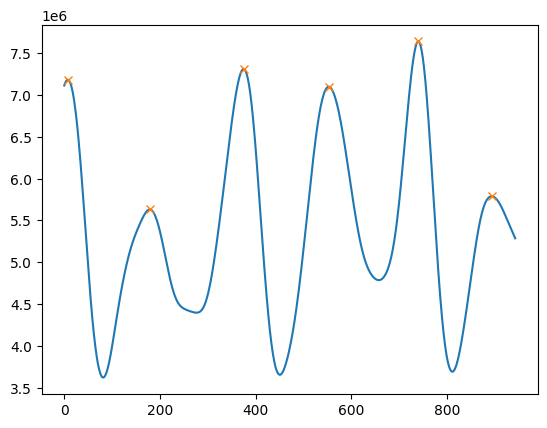

время сезона = 174


In [163]:
# сильно сглаживает данные и считает количество максимумов. Возвращает количество строк между ними (длина сезона) 
def countPeaksDelta(df, columnName,plot = False):
    defaultSeasonsToReturn = 174
    datasetLength = len(df)
    df = df.rolling(45).mean()
    df =df.dropna()
    df = df.rolling(30).mean()
    df =df.dropna()    
    df = df.rolling(20).mean()
    df =df.dropna()
    df = df.rolling(10).mean()
    df =df.dropna()
    df  = df.reset_index()
    df = df.drop(df.columns[0], axis=1)
    
    df = pd.Series(df[columnName], copy=True) #dataframe['G38 (Вес нетто)']
    peaks, _ = find_peaks(df)
    promin = signal.peak_prominences(df, peaks)[0]
    if plot == True:
        plt.plot(df, "-")
        plt.plot(peaks, df[peaks], "x")
        plt.show()
    
    if len(promin)==0:# если не нашлись пики
        return defaultSeasonsToReturn
    else:
        result = int(datasetLength / len(promin))
        if result<250: # если пиков так мало, что лучше пусть будет стандартное значение
            return result
        else:
            return defaultSeasonsToReturn
    
def littleResample(df, col):
    ts =df[col].resample('D').sum()
    ts = ts.rolling(window = 50).mean()
    ts =ts.dropna()
    return ts
    
def func (df, plotIT = False):
    ts = littleResample(df, 'G38 (Вес нетто)')
    seasoning = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = plotIT)    
    print("время сезона =", seasoning)
    return ts

ts = func(originCountryDict["РОССИЯ"],plotIT=True)
# func(originCountryDict["ФАРЕРСКИЕ ОСТРОВА"])

In [18]:
# тренирует ets  модель, возваращает её и предсказание по данным
def MakeModel(dataframe,seasonal_periods, percentPredict = 30):
    BorderRow = int(len(dataframe)/100*percentPredict)
    
    model = ETSModel(
        dataframe,
        error="add",
        trend="add",
        seasonal="add",
        damped_trend=True,
        seasonal_periods=seasonal_periods
    )
    fit = model.fit()
    
    units = len(dataframe)
    # pred = fit.get_prediction(start=5, end=units+200)
    pred = fit.get_prediction(start=len(dataframe), end=units+BorderRow)
    df = pred.summary_frame(alpha=0.01)
    return fit, df
    
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)

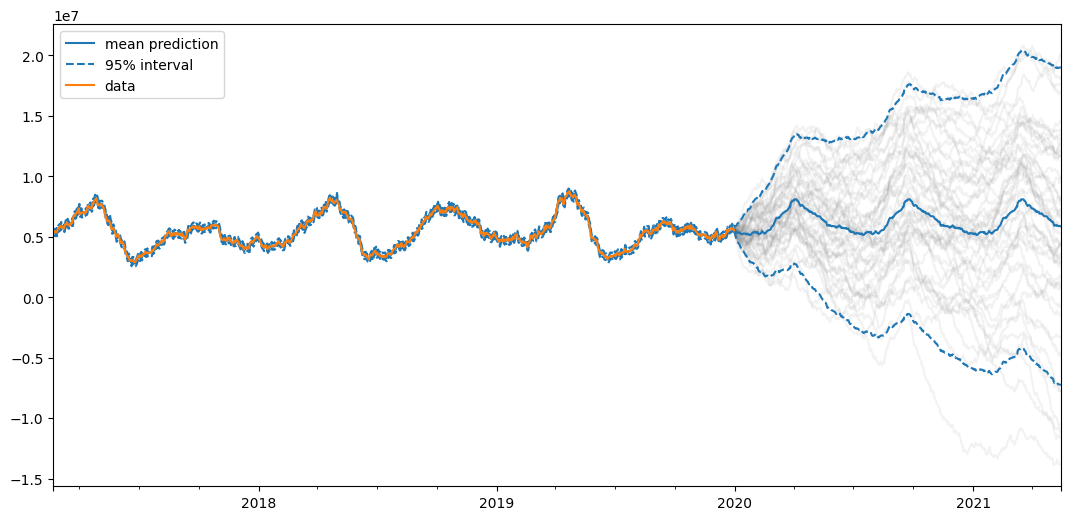

In [19]:

def plotModel(model,columName, dataframe, Count):
    pred = model.get_prediction(start=0, end=len(dataframe)+Count)
    df = pred.summary_frame(alpha=0.05)
    simulated = model.simulate(anchor="end", nsimulations=Count, repetitions=50)
    for i in range(simulated.shape[1]):
        simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)
    df["mean"].plot(label="mean prediction")
    df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
    df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
    pred.endog.plot(label="data",figsize = (13,6))
    plt.legend()
    plt.show()
    
plotModel(model,"mean prediction", ts,500)
    
    

In [20]:
# получает словарь с датафреймами и имя колонки. Отдает датафрейм только из этих колонок. Колонки именуются ключем словаря
def collectAllInOneData(slovarDF, ColumnName,DropNAN = True,resamle = True):
    
    firstKeyName = list(dict.keys(slovarDF))[0]
    # print(list(dict.keys(slovarDF)))
    df = slovarDF[firstKeyName][[ColumnName]].copy().rename(columns={ColumnName: firstKeyName})# стартуем с создания датафрейма с колонкой
    if resamle == True:
        df =df.resample('D').sum()
    # df = df.rolling(10).mean()
    df =df.dropna()
    
    
    for key in slovarDF:
        try:
            if firstKeyName == key:
                continue
            dfToADD = slovarDF[key][[ColumnName]].copy().rename(columns={ColumnName:key})
            if resamle == True:
                dfToADD =dfToADD.resample('D').sum()
            # dfToADD = dfToADD.rolling(10).mean()
            dfToADD =dfToADD.dropna()

            # df  = pd.concat([df,dfToADD], axis=1)
            df = df.join(dfToADD) # джойну плевать на разные индексы вроде
        except:
            pass
    
    if DropNAN == True:
        NanList = df.isnull().all()
        columnsToDelete = []
        loopIndex = 0
        for each in range(len(NanList)):
            if NanList[each] == True:
                columnsToDelete.append(loopIndex)
            loopIndex+=1
        df = df.drop(df.columns[columnsToDelete], axis=1)
        df.fillna(0)
    return df
# datframe = collectAllInOneData(originCountryDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
datframe = collectAllInOneData(senderRegionDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)

datframe[0:2]

АЛТАЙСКИЙ КРАЙ  КРАСНОДАРСКИЙ КРАЙ  \
G072 Дата регистрации ГТД                                       
2017-01-10                        12320.0             77034.0   
2017-01-11                            0.0             18533.0   

                           ПРИМОРСКИЙ КРАЙ  ХАБАРОВСКИЙ КРАЙ  \
G072 Дата регистрации ГТД                                      
2017-01-10                      4934406.72           51584.0   
2017-01-11                      1202718.00            7425.0   

                           АМУРСКАЯ ОБЛАСТЬ  АРХАНГЕЛЬСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                                            
2017-01-10                              0.0              272869.38   
2017-01-11                              0.0                   0.00   

                           АСТРАХАНСКАЯ ОБЛАСТЬ  ВОЛГОГРАДСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                                                
2017-01-10                                  0.0                    0.0   
2017-01-11                              18000.0                    0.0   

                           ВОРОНЕЖСКАЯ ОБЛАСТЬ  НИЖЕГОРОДСКАЯ ОБЛАСТЬ  ...  \
G072 Дата регистрации ГТД                                              ...   
2017-01-10                                 0.0                    0.0  ...   
2017-01-11                                 0.0                    0.0  ...   

                           РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)  САНКТ-ПЕТЕРБУРГ  \
G072 Дата регистрации ГТД                                                      
2017-01-10                                              0.0              0.0   
2017-01-11                                              0.0              0.0   

                           ТЮМЕНСКАЯ ОБЛАСТЬ  СТАВРОПОЛЬСКИЙ КРАЙ  \
G072 Дата регистрации ГТД                                           
2017-01-10                               0.0                  0.0   
2017-01-11                               0.0                  0.0   

                           ВЛАДИМИРСКАЯ ОБЛАСТЬ  ВОЛОГОДСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                                              
2017-01-10                                  0.0                  0.0   
2017-01-11                                  0.0                  0.0   

                           КОСТРОМСКАЯ ОБЛАСТЬ  ПЕРМСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                                          
2017-01-10                                 0.0               0.0   
2017-01-11                                 0.0               0.0   

                           ЯРОСЛАВСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                        
2017-01-10                                 0.0   
2017-01-11                                 0.0   

                           ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙОКРУГ - ЮГРА (ТЮМЕНСКАЯ ОБЛАСТЬ)  
G072 Дата регистрации ГТД                                                               
2017-01-10                                                               0.0            
2017-01-11                                                               0.0            

[2 rows x 66 columns]

In [21]:
# нормализация
def makeItNormed(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    df_norm = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
    return df_norm
dataNormed = makeItNormed(datframe)
dataNormed[0:2]

АЛТАЙСКИЙ КРАЙ  КРАСНОДАРСКИЙ КРАЙ  ПРИМОРСКИЙ КРАЙ  ХАБАРОВСКИЙ КРАЙ  \
0        0.586667            0.440602         0.254221          0.006802   
1        0.000000            0.106001         0.061964          0.000979   

   АМУРСКАЯ ОБЛАСТЬ  АРХАНГЕЛЬСКАЯ ОБЛАСТЬ  АСТРАХАНСКАЯ ОБЛАСТЬ  \
0               0.0               0.103565              0.000000   
1               0.0               0.000000              0.074043   

   ВОЛГОГРАДСКАЯ ОБЛАСТЬ  ВОРОНЕЖСКАЯ ОБЛАСТЬ  НИЖЕГОРОДСКАЯ ОБЛАСТЬ  ...  \
0                    0.0                  0.0                    0.0  ...   
1                    0.0                  0.0                    0.0  ...   

   РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)  САНКТ-ПЕТЕРБУРГ  ТЮМЕНСКАЯ ОБЛАСТЬ  \
0                               0.0              0.0                0.0   
1                               0.0              0.0                0.0   

   СТАВРОПОЛЬСКИЙ КРАЙ  ВЛАДИМИРСКАЯ ОБЛАСТЬ  ВОЛОГОДСКАЯ ОБЛАСТЬ  \
0                  0.0                   0.0                  0.0   
1                  0.0                   0.0                  0.0   

   КОСТРОМСКАЯ ОБЛАСТЬ  ПЕРМСКАЯ ОБЛАСТЬ  ЯРОСЛАВСКАЯ ОБЛАСТЬ  \
0                  0.0               0.0                  0.0   
1                  0.0               0.0                  0.0   

   ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙОКРУГ - ЮГРА (ТЮМЕНСКАЯ ОБЛАСТЬ)  
0                                                0.0            
1                                                0.0            

[2 rows x 66 columns]

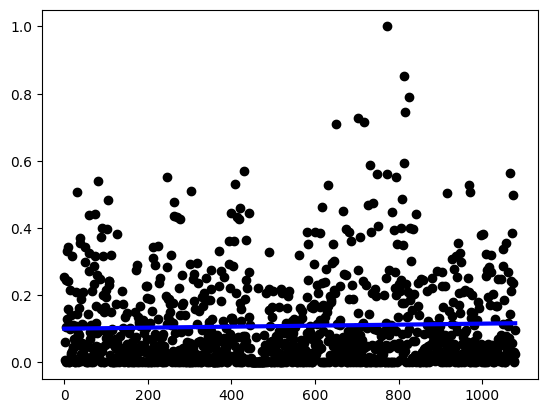

ПРИМОРСКИЙ КРАЙ 0.0014925198928529202


In [23]:
# даем датафрейм и говорим по какой колонке делать линейную модель. Возвращает наклон модели
def MakeLinear(dataframe, chooseThis,plot = True,Multyplication = 100):
    KeyName = str(list(dataframe)[chooseThis])
    y = dataframe[KeyName].copy().values
    x = np.array(list(range(len(y)))).reshape(-1, 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    y_pred = regr.predict(x)
    
    if plot == True:
        plt.scatter(x, y, color="black")
        plt.plot(x, y_pred, color="blue", linewidth=3)
        # print(KeyName,end =" ")
        # print(regr.coef_[0]*100)
        plt.show()

    return  KeyName, regr.coef_[0]*Multyplication
    
# MakeLinear(dataNormed, 2)
for each in range(2,3):
    keyName , koef = MakeLinear(makeItNormed(datframe), each ,plot = True)
    print(keyName , koef)

In [24]:
def PlotAllInDict(slovarDF, ColumnName):
    
    for key in slovarDF:
#         ts = slovarDF[].reset_index()
# dataframe = dataframe.drop(dataframe.columns[0], axis=1)
        
        ts =slovarDF[key][ColumnName].resample('D').sum()
        ts = ts.rolling(50).mean()
        ts =ts.dropna()
        
        fig, axs = plt.subplots()
        axs.plot()
        plt.show()
        
# PlotAllInDict(originCountryDict, 'G38 (Вес нетто)')

<AxesSubplot: xlabel='G072 Дата регистрации ГТД'>

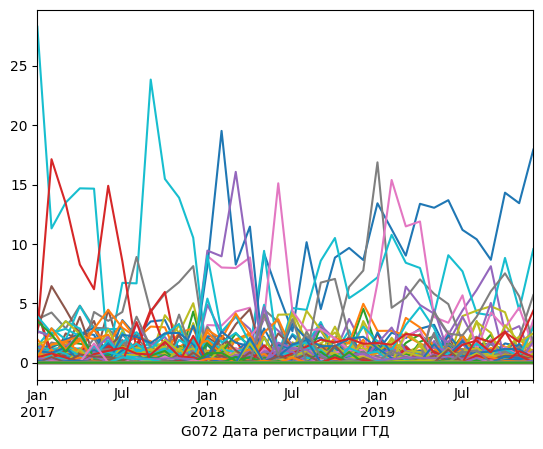

In [25]:
def CountMarketPart(datframe):
    MonthlyData =datframe.resample('M').sum()
    summedCol = MonthlyData.sum(axis=1)
    
    # MonthlyData = MonthlyData.reset_index(drop=True)
    MonthlyData = MonthlyData.reset_index()
    IndexColumnName = str(list(MonthlyData)[0])
    TrueIndexesColumn = MonthlyData[IndexColumnName].copy()
    MonthlyData = MonthlyData.drop(MonthlyData.columns[0], axis=1)
    
    
    columnsNamesList = list(MonthlyData.columns) 
    
    for index in MonthlyData.index:
        for column in MonthlyData.columns:
            indexOfThisColumn = columnsNamesList.index(column)

            val = MonthlyData.values[index,indexOfThisColumn] / summedCol.values[index]*100
            MonthlyData.values[index, indexOfThisColumn] = val
    
    # вернем нормальный индекс
    MonthlyData[IndexColumnName] = TrueIndexesColumn
    MonthlyData = MonthlyData.set_index(IndexColumnName)
    return MonthlyData


datframe = collectAllInOneData(senderNameDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
MonthlyData = CountMarketPart(datframe)

# Динамика доли рынка всех компаний. подписи выключим потому, что их довольно много. А график строим ознакомительный
MonthlyData.plot(legend = False)

<AxesSubplot: xlabel='G072 Дата регистрации ГТД'>

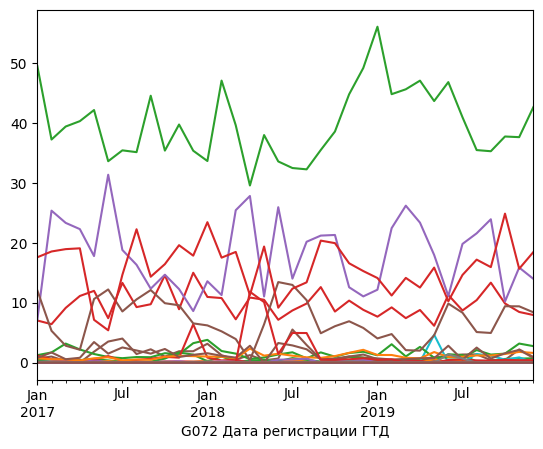

In [26]:
datframe = collectAllInOneData(senderRegionDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
MonthlyData = CountMarketPart(datframe)

# Динамика доли рынка всех регионов
MonthlyData.plot(legend = False)

In [27]:
MonthlyData[0:5]

АЛТАЙСКИЙ КРАЙ  КРАСНОДАРСКИЙ КРАЙ  \
G072 Дата регистрации ГТД                                       
2017-01-31                       0.025422            0.304824   
2017-02-28                       0.016579            0.158334   
2017-03-31                       0.006946            0.115322   
2017-04-30                       0.006314            0.157975   
2017-05-31                       0.030676            0.329487   

                           ПРИМОРСКИЙ КРАЙ  ХАБАРОВСКИЙ КРАЙ  \
G072 Дата регистрации ГТД                                      
2017-01-31                       49.542560          7.051529   
2017-02-28                       37.286299          6.442416   
2017-03-31                       39.458756          9.158930   
2017-04-30                       40.358391         11.150513   
2017-05-31                       42.213602         12.005531   

                           АМУРСКАЯ ОБЛАСТЬ  АРХАНГЕЛЬСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                                            
2017-01-31                              0.0               0.720350   
2017-02-28                              0.0               1.026013   
2017-03-31                              0.0               0.272923   
2017-04-30                              0.0               0.000000   
2017-05-31                              0.0               1.843282   

                           АСТРАХАНСКАЯ ОБЛАСТЬ  ВОЛГОГРАДСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                                                
2017-01-31                             0.162765                    0.0   
2017-02-28                             0.048471                    0.0   
2017-03-31                             0.072484                    0.0   
2017-04-30                             0.091416                    0.0   
2017-05-31                             0.163320                    0.0   

                           ВОРОНЕЖСКАЯ ОБЛАСТЬ  НИЖЕГОРОДСКАЯ ОБЛАСТЬ  ...  \
G072 Дата регистрации ГТД                                              ...   
2017-01-31                            0.119699               0.008457  ...   
2017-02-28                            0.054047               0.007920  ...   
2017-03-31                            0.033048               0.000000  ...   
2017-04-30                            0.032301               0.002162  ...   
2017-05-31                            0.044814               0.000000  ...   

                           РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)  САНКТ-ПЕТЕРБУРГ  \
G072 Дата регистрации ГТД                                                      
2017-01-31                                              0.0              0.0   
2017-02-28                                              0.0              0.0   
2017-03-31                                              0.0              0.0   
2017-04-30                                              0.0              0.0   
2017-05-31                                              0.0              0.0   

                           ТЮМЕНСКАЯ ОБЛАСТЬ  СТАВРОПОЛЬСКИЙ КРАЙ  \
G072 Дата регистрации ГТД                                           
2017-01-31                               0.0                  0.0   
2017-02-28                               0.0                  0.0   
2017-03-31                               0.0                  0.0   
2017-04-30                               0.0                  0.0   
2017-05-31                               0.0                  0.0   

                           ВЛАДИМИРСКАЯ ОБЛАСТЬ  ВОЛОГОДСКАЯ ОБЛАСТЬ  \
G072 Дата регистрации ГТД                                              
2017-01-31                                  0.0             0.000000   
2017-02-28                                  0.0             0.000065   
2017-03-31                                  0.0             0.000034   
2017-04-30                                  0.0             0.000000   
2017-05-31                                  0.0             0.000135   

               

In [28]:

# подсчет количества одинаковых случаев в датафрейме в конкретной колонке
def countExactDuplicates(df, ColumnToCountName):
    columnsNamesList = list(df.columns) 
    # columnsNamesList
    
    columnsToDelete = []
    bannedColumns = ['Unnamed: 0', "nan"]
    for each in columnsNamesList:
        # print(each)
        if each in bannedColumns:
            columnsToDelete.append(columnsNamesList.index(each))
    df = df.drop(df.columns[columnsToDelete], axis=1)
    counts = df[ColumnToCountName].value_counts().head()
    return counts


def CheckIfThisSeriesHasSuspiciousTransactions(dataseries, transactionCountBorder):
    # ind = 0
    # print(dataseries.index[ind])
    # print(dataseries[dataseries.index[ind]])
    if dataseries[dataseries.index[0]]>transactionCountBorder:
        return True, dataseries[dataseries.index[0]],dataseries.index[0]
    else:
        return False, 0, 0



# datframe = collectAllInOneData(senderNameDict, "G45 (Таможенная стоимость, руб)", DropNAN = True,resamle = False).fillna(0)
# ColumnToCountName = 'G38 (Вес нетто)' 
# slovarDF = senderNameDict
def FindSuspiciousTransactions(slovarDF, ColumnToCountName, borderCount = 20):
    for each in range(len(list(dict.keys(slovarDF)))):
        SlovarKey = list(dict.keys(slovarDF))[each]
        df = slovarDF[SlovarKey]
        dataseries = countExactDuplicates(df, ColumnToCountName)
        result, count, price = CheckIfThisSeriesHasSuspiciousTransactions(dataseries, borderCount)
        if result == True:
            print(SlovarKey, "count ", count, "price ",price)


FindSuspiciousTransactions(senderNameDict, 'G38 (Вес нетто)' , borderCount = 100)


ИП АТАНОВ ЮРИЙ АЛЕКСАНДРОВИЧ count  120 price  19200.0
ООО "ДАМТАЙХ ФИШ" count  121 price  18000.0


In [29]:
datframe = collectAllInOneData(originCountryDict, "G45 (Таможенная стоимость, руб)", DropNAN = True).fillna(0)
dataNormed = makeItNormed(datframe)

In [32]:
def MakeETSModels(slovarDF, ColumnName, plot = True):
    modelsSlovar = {}
    predictionsSlovar = {}
    DataSlovar = {}
    for key in slovarDF:

        df = slovarDF[key]
        df = littleResample(df, ColumnName)
        seasoning = countPeaksDelta(df, ColumnName,plot = False)
        print(key, "Season Length Found =",seasoning)

        model, predictedDF = MakeModel(df, seasonal_periods =seasoning, percentPredict = 50)
        lengthOfPrediction = 500 # len(ts)/100*50
        if plot == True:
            plotModel(model, "mean prediction", df, lengthOfPrediction)
        modelsSlovar[str(key)] = model
        predictionsSlovar[str(key)] = predictedDF
        DataSlovar[str(key)] = df
    return modelsSlovar, predictionsSlovar, DataSlovar


# originCountryModelsSlovar, originCountryPredictionsSlovar, originCountryDataSlovar = MakeETSModels(originCountryDict, 'G38 (Вес нетто)',plot = False)

In [33]:
# Функции чтоб было удобнее делать линейные модели и плотить их график
def MakeLinearModelsByDF(datframe,columnResultName, norm = True):
    if norm == True:
        datframe = makeItNormed(datframe)
    df1 = pd.DataFrame([['Non', 10]], columns=['item', columnResultName])
    columns = list(datframe)
    for each in range(len(columns)):
        keyName , koef = MakeLinear(datframe, each ,plot = False)
        df2 = pd.DataFrame([[keyName, koef]], columns=['item', columnResultName])
        df1 = pd.concat([df1,df2], axis=0)
    return df1[1:].reset_index(drop=True)


def MakeLinearModels(slovarDF, ColumnName, columnResultName, norm = True):
    datframe = collectAllInOneData(slovarDF, ColumnName, DropNAN = True).fillna(0)
    if norm == True:
        datframe = makeItNormed(datframe)
    df1 = pd.DataFrame([['Non', 10]], columns=['item', columnResultName])
    columns = list(datframe)
    for each in range(len(columns)):
        keyName , koef = MakeLinear(datframe, each ,plot = False)
        
        df2 = pd.DataFrame([[keyName, koef]], columns=['item', columnResultName])
        df1 = pd.concat([df1,df2], axis=0)
    return df1[1:].reset_index(drop=True)

def printLinearModelOfThat(slovarDF, WhatToPlot, ColumnName, norm = True):
    datframe = collectAllInOneData(slovarDF, ColumnName, DropNAN = True).fillna(0)
    if norm == True:
        datframe = makeItNormed(datframe)
    columns = list(datframe)
    for each in range(len(columns)):
        if columns[each] == WhatToPlot:
            keyName , koef = MakeLinear(datframe, each ,plot = True)

На этом написание функционала закончим и приступим к Анализу

In [ ]:
# Для начала построим круговые диаграмы для общего понимания Рынка.

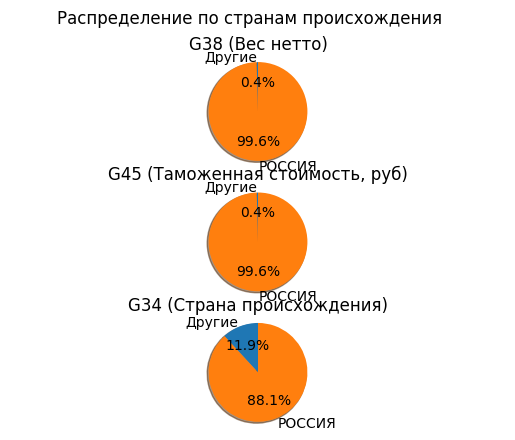

In [12]:
data1 = countTheweight(originCountryDict, "G38 (Вес нетто)", printData = False)
data2 = countThePrices(originCountryDict, "G45 (Таможенная стоимость, руб)", printData = False)
data3 = countNumInstances(originCountryDict, "G34 (Страна происхождения)", printData = False)
plotPies("Распределение по странам происхождения", [data1,data2,data3])

In [ ]:
# по категории Страна происхождения наибольшую долю занимает Россия, совершив 80073 операции экспорта. 
# В сумме денежных операций её доля в наборе данных и вовсе 99,6%

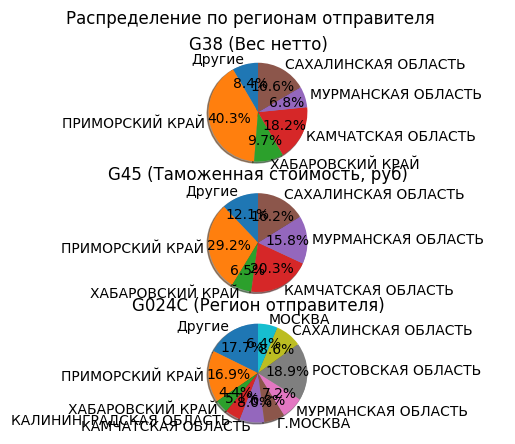

In [13]:
data1 = countTheweight(senderRegionDict, "G38 (Вес нетто)", printData = False)
data2 = countThePrices(senderRegionDict, "G45 (Таможенная стоимость, руб)", printData = False)
data3 = countNumInstances(senderRegionDict, "G024C (Регион отправителя)", printData = False)
plotPies("Распределение по регионам отправителя", [data1,data2,data3])

In [ ]:
# Среди регионов по количеству операций явного монополиста нет, однако два лидера:
# РОСТОВСКАЯ ОБЛАСТЬ 16675, ПРИМОРСКИЙ КРАЙ 14913. за ними следует САХАЛИНСКАЯ ОБЛАСТЬ 7630.
# Однако по финансовой части, ПРИМОРСКИЙ КРАЙ оказывается лидером совершая транзакции на сумму 172 млрд.
# По массе экспортируемых грузов лидерство также занимает ПРИМОРСКИЙ КРАЙ: 40.3%


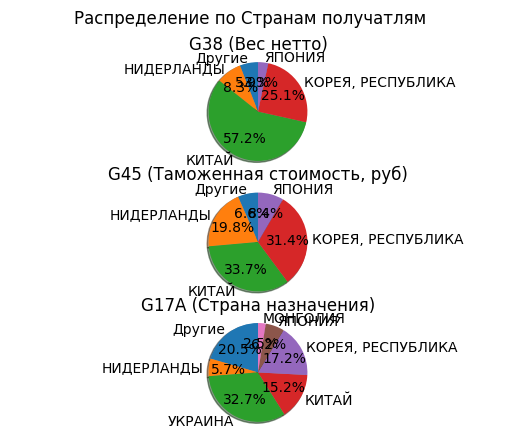

In [14]:
data1 = countTheweight(destinationCountryDict, "G38 (Вес нетто)", printData = False)
data2 = countThePrices(destinationCountryDict, "G45 (Таможенная стоимость, руб)", printData = False)
data3 = countNumInstances(destinationCountryDict, "G17A (Страна назначения)", printData = False)
plotPies("Распределение по Странам получатлям", [data1,data2,data3])

In [ ]:
# Страна назначения груза в подавляющем большинстве - УКРАИНА 28951. Второе третье место делят КОРЕЯ, РЕСПУБЛИКА 15171 и КИТАЙ 13453. 
# остальные страны занимают 34,88% транзакций
# Однако, если мы смотрим на финансовую часть, то наибольшими потребителями являются Китай, Республика Корея и Нидерланды. 
# По Массе поступающих грузов, Китай и вовсе занимает больше половины рынка. 

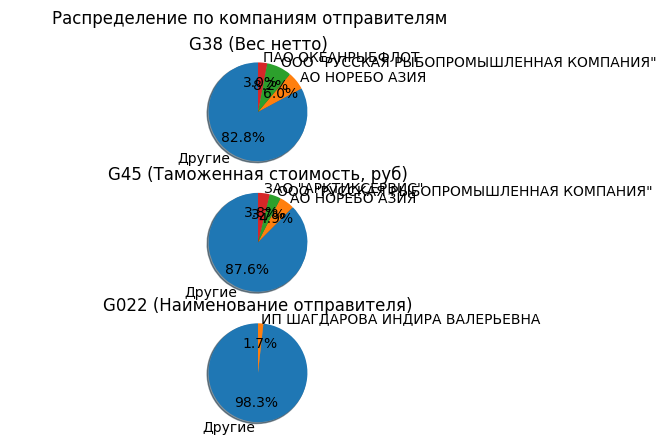

In [15]:
data1 = countTheweight(senderNameDict, "G38 (Вес нетто)", printData = False)
data2 = countThePrices(senderNameDict, "G45 (Таможенная стоимость, руб)", printData = False, EdgePercentForPlot = 3.5)
data3 = countNumInstances(senderNameDict, "G022 (Наименование отправителя)", printData = False, EdgePercentForPlot = 1.7)
plotPies("Распределение по компаниям отправителям", [data1,data2,data3])

In [ ]:
# Проводя оценку кампаний экспортеров можно с уверенностью сказать, что монополиста на рынке нет. 
# Самая крупная кампания по сумме экспорта: АО Норебо Азия, занимающая 4,9% рынка или 28,8 млрд р. 
# За ней следуют ООО “Русская рыбопромышленная кампания” и ПАО Океанрыбофлот, занимающие 3.7% и 3.4% соответственно. 
# Масса продукции у кампаний соответствует суммам.
# Самая активная кампании по количеству транзакций: ИП Шагдарова Индира Валерьевна, проводящая 1.7% операций.

In [34]:
# Посмотрим какие страны больш других потеряли или наоборот нарастили свою рыночную долю

In [35]:
datframe = collectAllInOneData(originCountryDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
MonthlyData = CountMarketPart(datframe)
dff = MakeLinearModelsByDF(MonthlyData,"line",  norm = False)
dff = dff.sort_values("line", axis=0)
dff.head(3)

item      line
0      РОССИЯ -0.776490
33  ФИНЛЯНДИЯ -0.023221
2        ПЕРУ -0.014400

In [36]:
dff.tail(3)

item      line
9          АРГЕНТИНА  0.072182
3               ЧИЛИ  0.074508
1  ФАРЕРСКИЕ ОСТРОВА  0.413062

In [37]:
# В нашей выборке больше всего потеряла рыночную долю Россия, Нарастили большим образом её ФАРЕРСКИЕ ОСТРОВА. Построим графики для них 

РОССИЯ


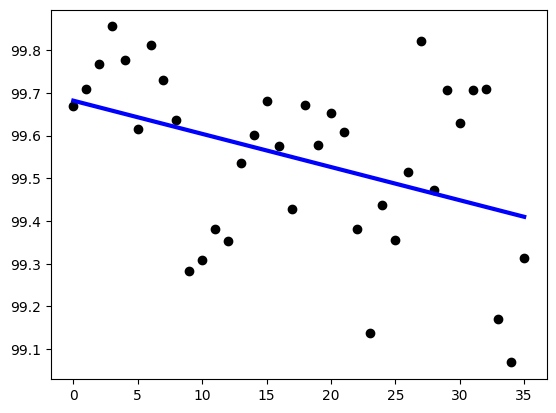

('РОССИЯ', -0.7764897939830305)

In [38]:
print('РОССИЯ')
MakeLinear(MonthlyData, 0 ,plot = True)


ФАРЕРСКИЕ ОСТРОВА


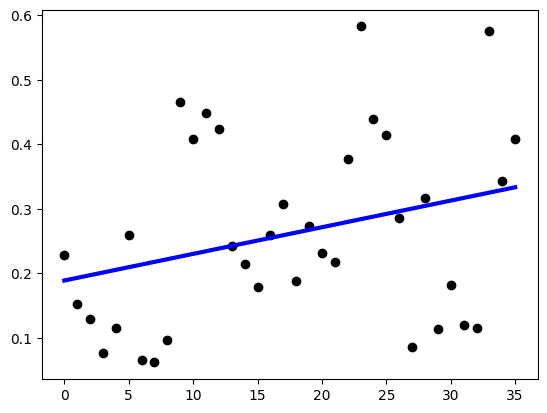

('ФАРЕРСКИЕ ОСТРОВА', 0.4130620687460417)

In [39]:
print('ФАРЕРСКИЕ ОСТРОВА')
MakeLinear(MonthlyData, 1 ,plot = True)

In [40]:
# Как мы видим, не смотря на наиболее значимую динамику в этих странах, общая доля рынка осталась неизменной.
# Россия по прежнему в течение каждого месяца занимает более 99% рынка


In [41]:
# Проведем анализ Регионов, оценим динамику роста их экспорта в натуральном выражении и в доле относительно других регионов. 

In [42]:
dff = MakeLinearModels(senderRegionDict, 'G38 (Вес нетто)',"Коэффициент линейной модели по массе грузов" )
dff = dff.sort_values("Коэффициент линейной модели по массе грузов", axis=0)

In [43]:
# наиболее сильное падение в объемах демонстрируют эти три региона

In [44]:
dff.head(3)

item  Коэффициент линейной модели по массе грузов
8    ВОРОНЕЖСКАЯ ОБЛАСТЬ                                    -0.007630
26  НОВГОРОДСКАЯ ОБЛАСТЬ                                    -0.005940
24    МОСКОВСКАЯ ОБЛАСТЬ                                    -0.005679

In [45]:
# Посмотрим месячную динамику воронежской области 

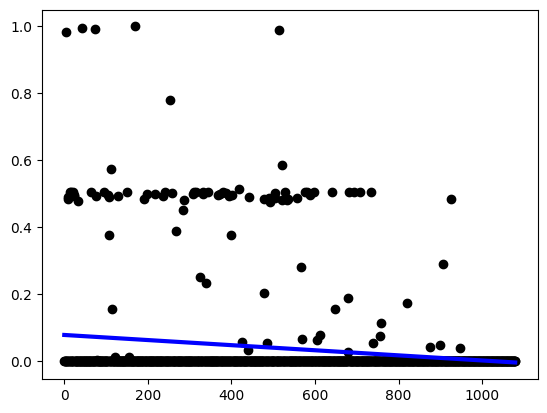

In [46]:
printLinearModelOfThat(senderRegionDict,"ВОРОНЕЖСКАЯ ОБЛАСТЬ", 'G38 (Вес нетто)')

In [47]:
# наиболее сильный рост в объемах демонстрируют эти три региона

In [48]:
dff.tail(3)

item  Коэффициент линейной модели по массе грузов
44   РЕСПУБЛИКА ДАГЕСТАН                                     0.006605
47  ЧЕЧЕНСКАЯ РЕСПУБЛИКА                                     0.006645
31    РОСТОВСКАЯ ОБЛАСТЬ                                     0.011543

In [49]:
# Посмотрим месячную динамику Ростовской области

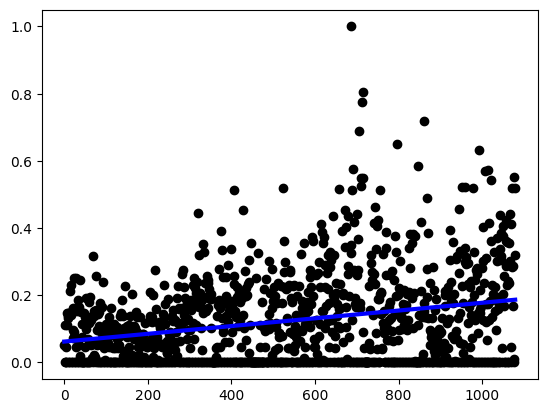

In [50]:
printLinearModelOfThat(senderRegionDict,"РОСТОВСКАЯ ОБЛАСТЬ", 'G38 (Вес нетто)')

In [51]:
# Теперь сравним натуральные объемы экспорта и долю рынка, которую занимают регионы

In [52]:
datframe = collectAllInOneData(senderRegionDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
MonthlyData = CountMarketPart(datframe)
senderRegionLinear = MakeLinearModels(senderRegionDict, 'G38 (Вес нетто)',"Коэффициент линейной модели по массе грузов" )
MarketPartModel = MakeLinearModelsByDF(MonthlyData,"Коэффициент линейной модели по доле рынка региона по массе грузов",  norm = False)


senderRegionLinear2 = senderRegionLinear.set_index('item')
MarketPartModel2 = MarketPartModel.set_index('item')
compareSenderExportAndMarketPart = senderRegionLinear2.join(MarketPartModel2)


compareSenderExportAndMarketPart = compareSenderExportAndMarketPart.sort_values("Коэффициент линейной модели по доле рынка региона по массе грузов", axis=0)
compareSenderExportAndMarketPart.head(2)


Коэффициент линейной модели по массе грузов  \
item                                                              
МУРМАНСКАЯ ОБЛАСТЬ                                    -0.000694   
Г.МОСКВА                                              -0.001661   

                    Коэффициент линейной модели по доле рынка региона по массе грузов  
item                                                                                   
МУРМАНСКАЯ ОБЛАСТЬ                                          -5.403784                  
Г.МОСКВА                                                    -3.123968

In [53]:
# Хуже всего в доле экспорта среди регионов показывает себя мурманская область
# Посмотрим на месячную динамику доли рынка мурманской области

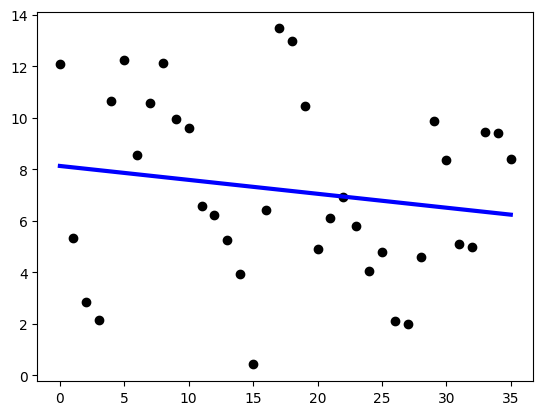

('МУРМАНСКАЯ ОБЛАСТЬ', -5.403783793186774)

In [54]:
MakeLinear(MonthlyData, 25 ,plot = True)

In [55]:
compareSenderExportAndMarketPart.tail(2)

Коэффициент линейной модели по массе грузов  \
item                                                             
Г.САНКТ-ПЕТЕРБУРГ                                     0.001864   
ПРИМОРСКИЙ КРАЙ                                       0.001493   

                   Коэффициент линейной модели по доле рынка региона по массе грузов  
item                                                                                  
Г.САНКТ-ПЕТЕРБУРГ                                            2.79516                  
ПРИМОРСКИЙ КРАЙ                                              9.55243

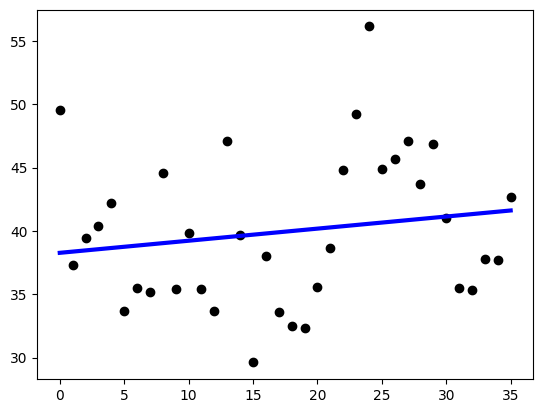

('ПРИМОРСКИЙ КРАЙ', 9.552429690830735)

In [56]:
# Наиболее сильный рост относительно других регионов демонстрирует ПРИМОРСКИЙ КРАЙ. Посмотрим его месячную динамику.

MakeLinear(MonthlyData, 2 ,plot = True)

In [57]:
# Оценим так-же компании экспортеры.

In [58]:
datframe = collectAllInOneData(senderNameDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
CompMonthlyData = CountMarketPart(datframe)
senderCompLinear = MakeLinearModels(senderNameDict, 'G38 (Вес нетто)',"Коэффициент линейной модели по массе грузов" )
CompMarketPartModel = MakeLinearModelsByDF(CompMonthlyData,"Коэффициент линейной модели по доле рынка компании по массе грузов",  norm = False)


senderCompLinear2 = senderCompLinear.set_index('item')
CompMarketPartModel2 = CompMarketPartModel.set_index('item')
compareSenderExportAndMarketPart = senderCompLinear2.join(CompMarketPartModel2)


compareSenderExportAndMarketPart = compareSenderExportAndMarketPart.sort_values("Коэффициент линейной модели по доле рынка компании по массе грузов", axis=0)
compareSenderExportAndMarketPart.head(2)

Коэффициент линейной модели по массе грузов  \
item                                                                                   
ПАО "ОКЕАНРЫБФЛОТ"                                                         -0.006255   
ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"                                    -0.004069   

                                         Коэффициент линейной модели по доле рынка компании по массе грузов  
item                                                                                                         
ПАО "ОКЕАНРЫБФЛОТ"                                                              -29.083553                   
ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"                                         -22.276501

In [59]:
# хуже всего в доле экспорта среди компаний экспортеров  показывает себя себя  ПАО "ОКЕАНРЫБФЛОТ" и 
# ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ". 
# Посмотрим на их месячные графики доли рынка

In [60]:
list(CompMonthlyData).index('ПАО "ОКЕАНРЫБФЛОТ"')

593

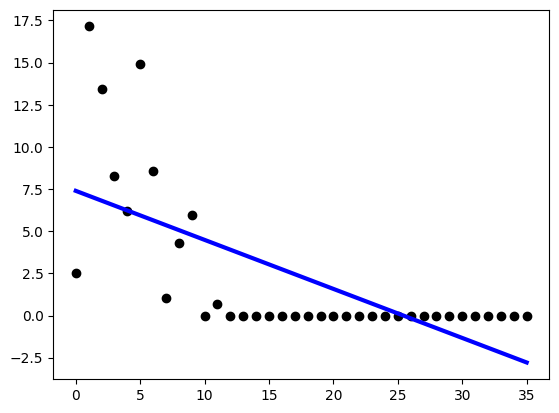

('ПАО "ОКЕАНРЫБФЛОТ"', -29.08355256237955)

In [61]:
MakeLinear(CompMonthlyData, 593 ,plot = True)

In [62]:
list(CompMonthlyData).index('ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"')

39

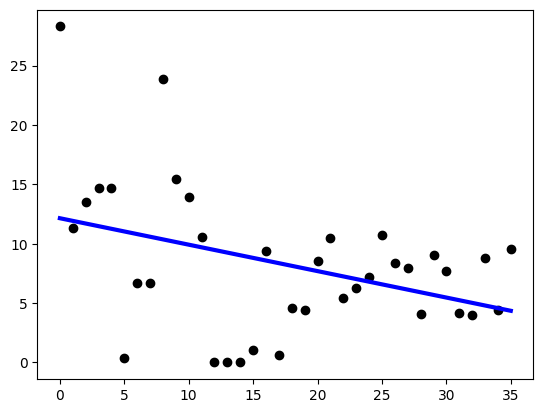

('ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"', -22.276500578516952)

In [63]:
MakeLinear(CompMonthlyData, 39 ,plot = True)

In [64]:
# Так же можем оценить Натуральные объемы экспорта и Суммы экспорта этих компаний. 

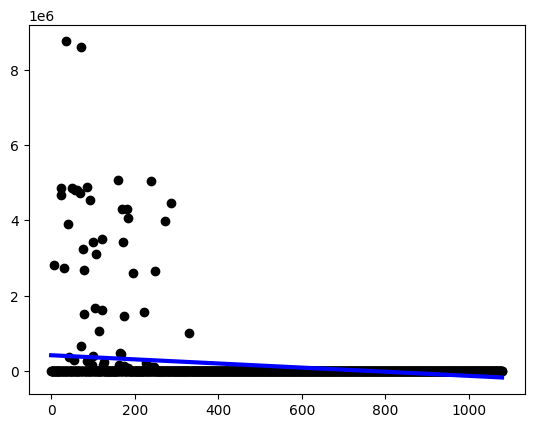

In [65]:
printLinearModelOfThat(senderNameDict, 'ПАО "ОКЕАНРЫБФЛОТ"', 'G38 (Вес нетто)', norm = False)

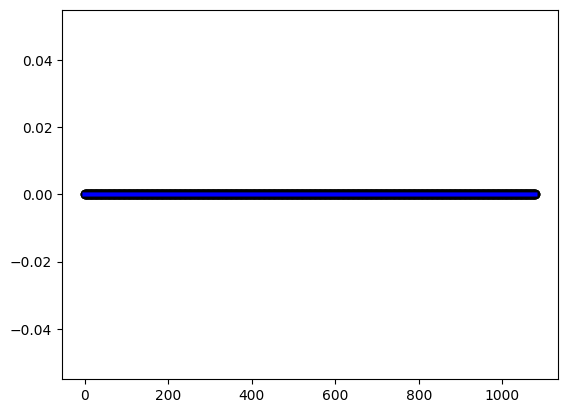

In [66]:
printLinearModelOfThat(senderNameDict, 'ПАО "ОКЕАНРЫБФЛОТ"', "G45 (Таможенная стоимость, руб)", norm = False)

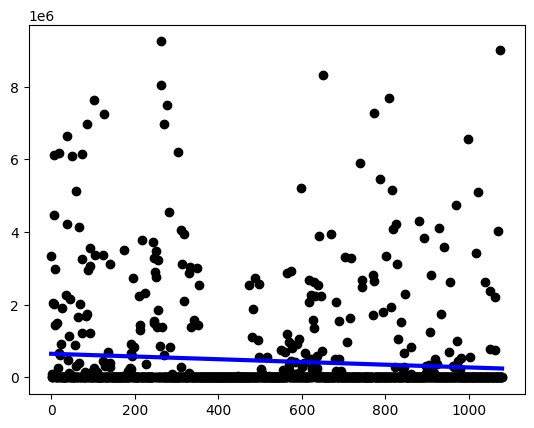

In [67]:
printLinearModelOfThat(senderNameDict, 'ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"', 'G38 (Вес нетто)', norm = False)

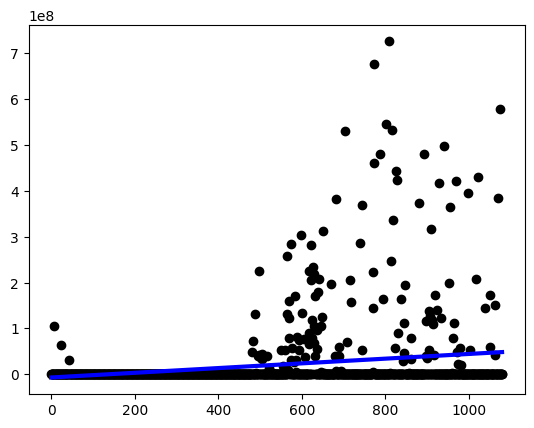

In [68]:
printLinearModelOfThat(senderNameDict, 'ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"', "G45 (Таможенная стоимость, руб)", norm = False)

In [69]:
# Почему некоторые сделки не имеют значений таможенной стоимости по этим данным сказать не возможно

In [70]:
# Посмотрим на наиболее Растущие компании. 

In [71]:
compareSenderExportAndMarketPart.tail(5)

Коэффициент линейной модели по массе грузов  \
item                                                                                              
ЗАО "КУРИЛЬСКИЙ РЫБАК"                                                                 0.002859   
ПАО НАХОДКИНСКАЯ БАЗА АКТИВНОГО МОРСКОГО РЫБОЛО...                                     0.005064   
ПАО ПРЕОБРАЖЕНСКАЯ БАЗА ТРАЛОВОГО ФЛОТА                                                0.004502   
ПАО ОКЕАНРЫБФЛОТ                                                                       0.004435   
АО НОРЕБО АЗИЯ                                                                         0.008860   

                                                    Коэффициент линейной модели по доле рынка компании по массе грузов  
item                                                                                                                    
ЗАО "КУРИЛЬСКИЙ РЫБАК"                                                                      11.168452                   
ПАО НАХОДКИНСКАЯ БАЗА АКТИВНОГО МОРСКОГО РЫБОЛО...                                          14.339328                   
ПАО ПРЕОБРАЖЕНСКАЯ БАЗА ТРАЛОВОГО ФЛОТА                                                     16.673442                   
ПАО ОКЕАНРЫБФЛОТ                                                                            19.331005                   
АО НОРЕБО АЗИЯ                                                                              50.534957

In [72]:
list(CompMonthlyData).index('АО НОРЕБО АЗИЯ')

20

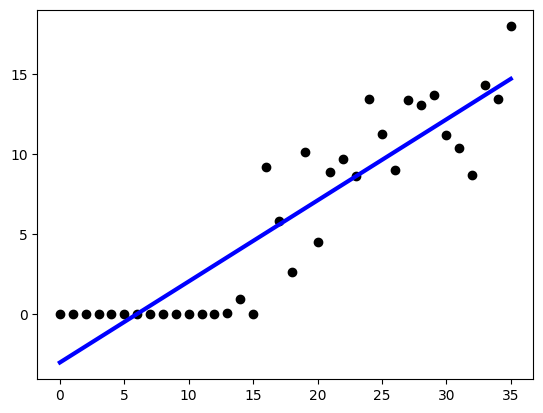

('АО НОРЕБО АЗИЯ', 50.534957044592986)

In [73]:
# Наиболее сильный рост относительно других компаний демонстрируетАО НОРЕБО АЗИЯ. Посмотрим  месячную динамику.

MakeLinear(CompMonthlyData, 20 ,plot = True)

In [74]:
list(CompMonthlyData).index('ПАО ОКЕАНРЫБФЛОТ')

666

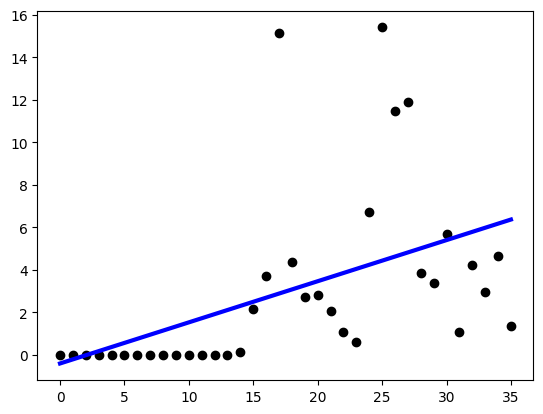

('ПАО ОКЕАНРЫБФЛОТ', 19.331005104058104)

In [75]:
MakeLinear(CompMonthlyData, 666 ,plot = True)

In [76]:
# По круговым диаграммам мы установили, что наиболее активным потребителем является китай. 
# Посмотрим куда экспортируют свою продукцию пять наиболее растущих компаний

In [77]:
senderNameDict['АО НОРЕБО АЗИЯ']['G17A (Страна назначения)'].value_counts()

КОРЕЯ, РЕСПУБЛИКА          691
КИТАЙ                      378
НИДЕРЛАНДЫ                  80
ГЕРМАНИЯ                    73
ФРАНЦИЯ                     50
ИСПАНИЯ                     20
СОЕДИНЕННОЕ КОРОЛЕВСТВО     15
ЯПОНИЯ                       2
ИТАЛИЯ                       2
ЮЖНАЯ АФРИКА                 1
СОЕДИНЕННЫЕ ШТАТЫ            1
Name: G17A (Страна назначения), dtype: int64

In [78]:
senderNameDict['ПАО ОКЕАНРЫБФЛОТ']['G17A (Страна назначения)'].value_counts()

КОРЕЯ, РЕСПУБЛИКА    162
КИТАЙ                154
ГЕРМАНИЯ               3
Name: G17A (Страна назначения), dtype: int64

In [79]:
senderNameDict['ПАО ПРЕОБРАЖЕНСКАЯ БАЗА ТРАЛОВОГО ФЛОТА']['G17A (Страна назначения)'].value_counts()

ЯПОНИЯ               110
КИТАЙ                 72
КОРЕЯ, РЕСПУБЛИКА     71
НЕИЗВЕСТНА             8
НИГЕРИЯ                3
Name: G17A (Страна назначения), dtype: int64

In [80]:
senderNameDict['ПАО НАХОДКИНСКАЯ БАЗА АКТИВНОГО МОРСКОГО РЫБОЛОВСТВА']['G17A (Страна назначения)'].value_counts()

КИТАЙ                311
КОРЕЯ, РЕСПУБЛИКА    110
Name: G17A (Страна назначения), dtype: int64

In [81]:
senderNameDict['ЗАО "КУРИЛЬСКИЙ РЫБАК"']['G17A (Страна назначения)'].value_counts()

КИТАЙ                116
КОРЕЯ, РЕСПУБЛИКА     63
ЯПОНИЯ                14
АНГОЛА                 3
ТОГО                   1
ГАНА                   1
Name: G17A (Страна назначения), dtype: int64

In [82]:
# Действительно, довольно большую долю занимает Китай. 
# Оценим так-же самого крупного поставщика в натуральном выражении

In [83]:
list(CompMonthlyData).index('ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА')

1332

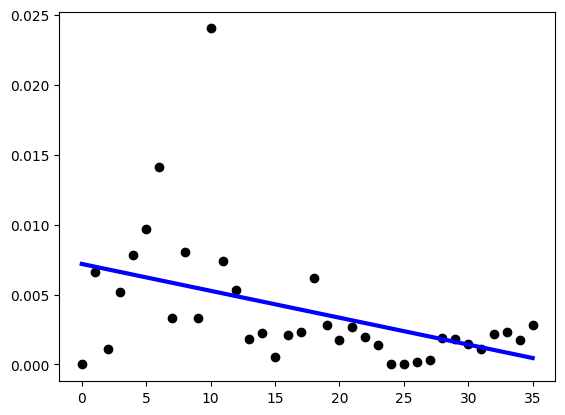

('ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА', -0.019219753945762377)

In [84]:
# График доли рынка наиболее крупного поставщика
MakeLinear(CompMonthlyData, 1332 ,plot = True)

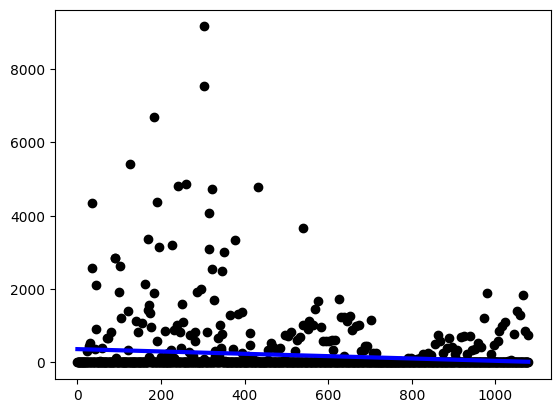

In [85]:
# Объем поставок в натуральном выражении поставщика
printLinearModelOfThat(senderNameDict, 'ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА', 'G38 (Вес нетто)', norm = False)

In [86]:
senderNameDict['ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА']['G17A (Страна назначения)'].value_counts()

МОНГОЛИЯ    1510
Name: G17A (Страна назначения), dtype: int64

In [87]:
# Поставщик, отправляющий наибольший объем продукции, экспортирует её исключительно в Монголию

In [88]:
# Мы посмотрели на показатели Регионов экспортеров и компаний экспортеров. 
# Теперь предлагаю оценить корреляцию между динамикой компани и регионом, в которой она расположена
# Рост экспорта компании увеличивает показатели региона. 
# Наиболее интересны в нашем случае две категории компаний: 
    
# Растущие компании в регионах с падающим экспортом, 
# есть ли вообще такие и за счет чего они идут против тренда.

# Падающие компании в регионах с ростом экспорта
# Что они делают не так

In [89]:
datframe = collectAllInOneData(senderRegionDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
MonthlyData = CountMarketPart(datframe)
senderRegionLinear = MakeLinearModels(senderRegionDict, 'G38 (Вес нетто)',"Регион: Коэффициент линейной модели" )

datframe = collectAllInOneData(senderNameDict, 'G38 (Вес нетто)', DropNAN = True).fillna(0)
CompMonthlyData = CountMarketPart(datframe)
senderCompLinear = MakeLinearModels(senderNameDict, 'G38 (Вес нетто)',"Компания: Коэффициент линейной модели по массе грузов" )


senderRegionLinear2 = senderRegionLinear.set_index('item')
senderCompLinear2 = senderCompLinear.set_index('item')


df1 = pd.DataFrame([['Non','Non2', 42, 34]], columns=['Организация',"Основной регион организации","Коэффициент модели организации", "Коэффициент модели Региона"])
for each in list(CompMonthlyData):
    try:
        name = each
        itsRegion=senderNameDict[each]["G024C (Регион отправителя)"].mode()[0]
        koefForComp= senderCompLinear2.loc[name,"Компания: Коэффициент линейной модели по массе грузов"]
        koefForreg= senderRegionLinear2.loc[itsRegion,"Регион: Коэффициент линейной модели"]

        # print(name, " |",itsRegion)
        # print(koefForComp, " |",koefForreg)
        df2 = pd.DataFrame([[name,itsRegion, koefForComp, koefForreg]], columns=['Организация',"Основной регион организации","Коэффициент модели организации", "Коэффициент модели Региона"])
        df1 = pd.concat([df1,df2], axis=0)
    except Exception as e:
        pass
        # print(e, " ", name)
df1 = df1[1:].reset_index(drop=True)

df1 = df1.sort_values("Коэффициент модели организации", axis=0)
df1.to_csv("сопоставление динамики организации и регионам(сортировка по организации).csv")
df1

Организация  \
1148                                        ООО"НАТАЛИ"   
744                      ООО " ТОРГОВЫЙ ДОМ УЛЬТРА ФИШ"   
1044                                          ООО "КМК"   
851                            ООО "РК "ПОЛЯРНОЕ МОРЕ+"   
864                                ЗАО "НОРД-ВЕСТ Ф.К."   
...                                                 ...   
1040                                          ООО "ЮСС"   
1024                                           ООО "СП"   
742                       ООО "ТОРГОВЫЙ ДОМ УЛЬТРА ФИШ"   
839                             ООО "РК ПОЛЯРНОЕ МОРЕ+"   
1042  ООО "РЫБОПЕРЕРАБАТЫВАЮЩЕЕ ПРЕДПРИЯТИЕ РУССКИЙ ...   

     Основной регион организации  Коэффициент модели организации  \
1148         САХАЛИНСКАЯ ОБЛАСТЬ                       -0.012613   
744                     Г.МОСКВА                       -0.012473   
1044          РОСТОВСКАЯ ОБЛАСТЬ                       -0.010754   
851           МУРМАНСКАЯ ОБЛАСТЬ                       -0.010593   
864           МУРМАНСКАЯ ОБЛАСТЬ                       -0.009700   
...                          ...                             ...   
1040          РОСТОВСКАЯ ОБЛАСТЬ                        0.009648   
1024           ПСКОВСКАЯ ОБЛАСТЬ                        0.010444   
742                       МОСКВА                        0.014104   
839           МУРМАНСКАЯ ОБЛАСТЬ                        0.017192   
1042          РОСТОВСКАЯ ОБЛАСТЬ                        0.018109   

      Коэффициент модели Региона  
1148                    0.000043  
744                    -0.001661  
1044                    0.011543  
851                    -0.000694  
864                    -0.000694  
...                          ...  
1040                    0.011543  
1024                    0.003594  
742                     0.000855  
839                    -0.000694  
1042                    0.011543  

[1781 rows x 4 columns]

In [90]:
df1 = df1.sort_values("Коэффициент модели Региона", axis=0)
df1.to_csv("сопоставление динамики организации и региона(сортировка по региону).csv")

In [91]:
# Давайте посмотрим на корреляцию значения роста экспорта организации и Региона
corr_matrix = df1.corr()
corr_matrix["Коэффициент модели организации"].sort_values(ascending=False)

Коэффициент модели организации    1.000000
Коэффициент модели Региона        0.097872
Name: Коэффициент модели организации, dtype: float64

In [92]:
# Корреляция есть, но очень слабая. Очевидно, регион экспорта имеет значение, но довольно слабое

In [93]:
# На какие же компании мы будем пристально смотреть ? 
# компания 'ООО "РК ПОЛЯРНОЕ МОРЕ+"' вторая по росту в натуральном показателе.  расположена в мурманской области, которая демонстрирует отрицательную динамику  
# Тоже самое можно сказать про 'ООО "ФАВОРИТ"' в краснодарском крае

# Пара обратных случаев - компании с отрицательной динамикой, однако в регионах демонстрирующих рост: 
# 'ООО "КМК"' в Ростовской области
# 'ООО ВЕРЕСК'

In [94]:
# Для начала давайте посмотрим, куда именно отправляют свою продукцию выбранные случаи

In [95]:
senderNameDict['ООО "РК ПОЛЯРНОЕ МОРЕ+"']['G17A (Страна назначения)'].value_counts()

СОЕДИНЕННОЕ КОРОЛЕВСТВО    459
НИДЕРЛАНДЫ                 173
НОРВЕГИЯ                    10
ФРАНЦИЯ                      4
ПОЛЬША                       1
Name: G17A (Страна назначения), dtype: int64

In [96]:
senderNameDict['ООО "ФАВОРИТ"']['G17A (Страна назначения)'].value_counts()

УКРАИНА    689
Name: G17A (Страна назначения), dtype: int64

In [97]:
# Крепкие экспортеры работают на рынок европы. ООО "ФАВОРИТ" и вовсе производит экспорт только в Украину. 

In [98]:
senderNameDict['ООО "КМК"']['G17A (Страна назначения)'].value_counts()

УКРАИНА    223
Name: G17A (Страна назначения), dtype: int64

In [99]:
senderNameDict['ООО ВЕРЕСК']['G17A (Страна назначения)'].value_counts()

ЛИТВА    55
Name: G17A (Страна назначения), dtype: int64

In [100]:
# Два слабых экспортера тоже как не странно работают на рынок европы и один из них тоже Шлет продукцию в украину.
# Очевидно, страна покупателя не является определяющим показателем того, как идут дела в компании.

In [101]:
# Возможно нам следует посмотреть, из каких ещё регионов эти компании возят груз

In [102]:
senderNameDict['ООО "РК ПОЛЯРНОЕ МОРЕ+"']["G024C (Регион отправителя)"].value_counts()

МУРМАНСКАЯ ОБЛАСТЬ    647
Name: G024C (Регион отправителя), dtype: int64

In [103]:
senderNameDict['ООО "ФАВОРИТ"']["G024C (Регион отправителя)"].value_counts()

КРАСНОДАРСКИЙ КРАЙ    718
Name: G024C (Регион отправителя), dtype: int64

In [104]:
senderNameDict['ООО "КМК"']["G024C (Регион отправителя)"].value_counts()

РОСТОВСКАЯ ОБЛАСТЬ    236
Name: G024C (Регион отправителя), dtype: int64

In [105]:
senderNameDict['ООО ВЕРЕСК']["G024C (Регион отправителя)"].value_counts()

АСТРАХАНСКАЯ ОБЛАСТЬ    50
Name: G024C (Регион отправителя), dtype: int64

In [106]:
# нет, с регионами сюрпризов не оказалось, все компании возят продукцию из одного единственного региона,
# Значит и этот критерий не коррелирует с значениями экспорта

In [107]:
# В целом можно сказать, что компании действительно отличаются друг от друга, 
# однако динамику их работы по нашим данным предсказать, увы нельзя
# Хотя мы уже установили, что наиболее быстро растущие экспортеры проводили экспорт на рынки наиболее крупных рынков

In [108]:
# Мы сопоставили экспортную динамику компаний и регионов. 
# Вспомним, что у нас была задача посмотреть, как идут дела у компаний, осфуществляющих подозрительные транзакции с одинаковыми суммами
# Для начала посмотрим, есть ли одинаковая масса

In [109]:
FindSuspiciousTransactions(senderNameDict, 'G38 (Вес нетто)' , borderCount = 10)

ШУСТОВА СВЕТЛАНА ГЕННАДЬЕВНА ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ count  15 price  16200.0
ИП АТАНОВ ЮРИЙ АЛЕКСАНДРОВИЧ count  120 price  19200.0
ООО "ФАВОРИТ" count  35 price  500.0
АХТЯМОВ СЕРГЕЙ АНДРЕЕВИЧ count  11 price  100.0
ОСЕЛЕДЬКО СЕРГЕЙ НИКОЛАЕВИЧ count  12 price  200.0
АХТЯМОВ АНДРЕЙ ТЕЛЬМАНОВИЧ count  12 price  200.0
ООО "НПКА НЕРЕИДА" count  35 price  5000.0
АО ЮЖМОРРЫБФЛОТ count  15 price  115038.0
ООО "ЗАРУБИНСКАЯ БАЗА ФЛОТА" count  46 price  5000.0
ООО "МАРИН ТРЭЙД" count  12 price  224224.0
ООО "ФИШ" count  61 price  19500.0
ООО "АКВАТЕХНОЛОГИИ" count  29 price  19040.0
ООО"АКВАТЕХНОЛОГИИ" count  11 price  19040.0
ООО "ВЕЛЕС" count  29 price  100.0
ООО "СОБОЛЬ" count  11 price  22500.0
ООО "МИРОСЛАВИЯ" count  12 price  500.0
ООО "ДАВИКА" count  37 price  18000.0
ООО "ИНТЕРФИШ-А" count  12 price  18000.0
НЕВЛЮДОВ ИЛЬДАР РАШИДОВИЧ ИП count  14 price  18000.0
ООО "ДАМТАЙХ ФИШ" count  121 price  18000.0
ООО "ПОСЕЙДОН-2000" count  14 price  576.0
ООО "ПРОФЭКС" count  12 price  1

In [110]:
# Компании, проводящие множество одинаковых транзакций с подозрительно низкими ценами. посмотрим на графики этих компаний
# ИП БРЕДНИЙ ВАДИМ ВИТАЛЬЕВИЧ count  21 price  3.0
# ООО "ЮГТЕХРЕСУРС" count  13 price  60.0
# ООО "ТЭК" count  11 price  9.6
# ООО "МОНОЛИТ" count  14 price  10.0
# ОАО ПКП "МЕРИДИАН" count  13 price  8.95
# ОАО "ПКП МЕРИДИАН" count  11 price  29.34
# ООО "СНЭК-ГРУП" count  16 price  20.0
# ООО "МАСТЕРФУД" count  25 price  75.6

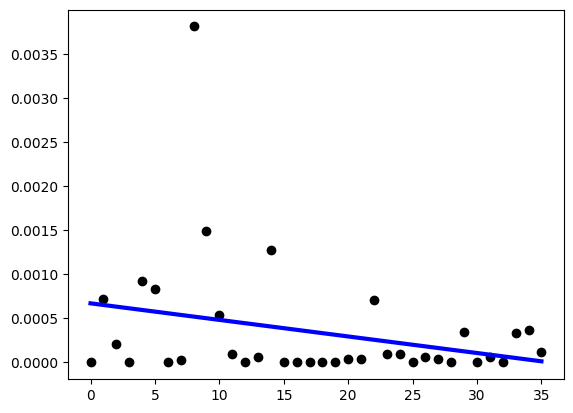

('ИП БРЕДНИЙ ВАДИМ ВИТАЛЬЕВИЧ', -0.0018776201553480942)

In [111]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ИП БРЕДНИЙ ВАДИМ ВИТАЛЬЕВИЧ') ,plot = True)

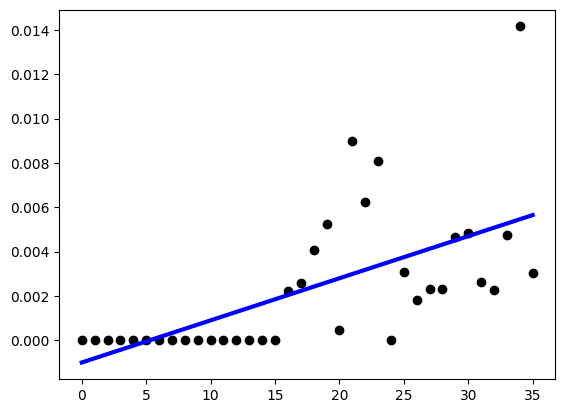

('ООО "ЮГТЕХРЕСУРС"', 0.018986922290312968)

In [112]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ООО "ЮГТЕХРЕСУРС"') ,plot = True)

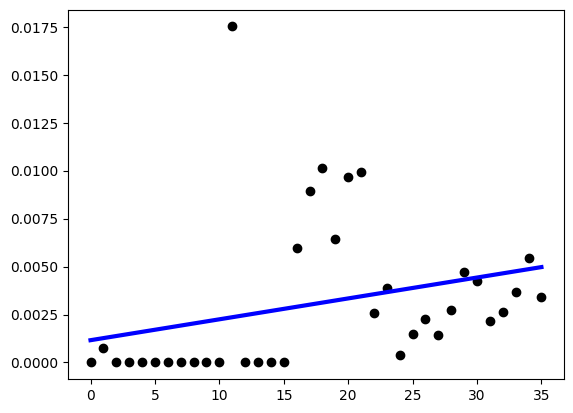

('ООО "ТЭК"', 0.01089078602478675)

In [113]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ООО "ТЭК"') ,plot = True)

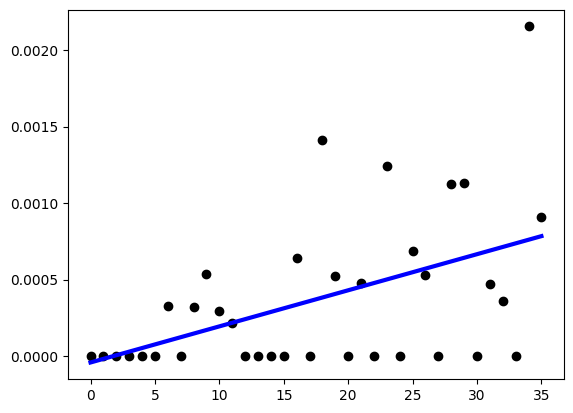

('ООО "МОНОЛИТ"', 0.002358794844125892)

In [114]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ООО "МОНОЛИТ"') ,plot = True)

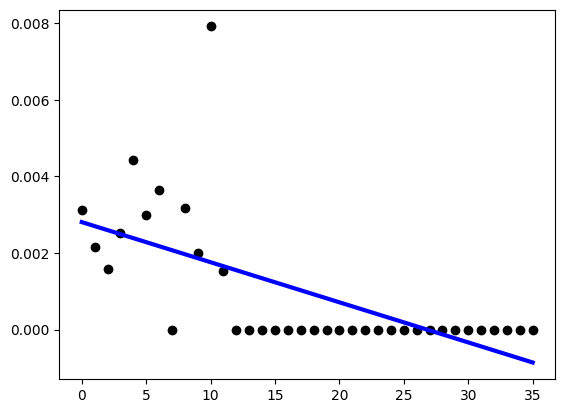

('ОАО ПКП "МЕРИДИАН"', -0.010467642068535078)

In [115]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ОАО ПКП "МЕРИДИАН"') ,plot = True)

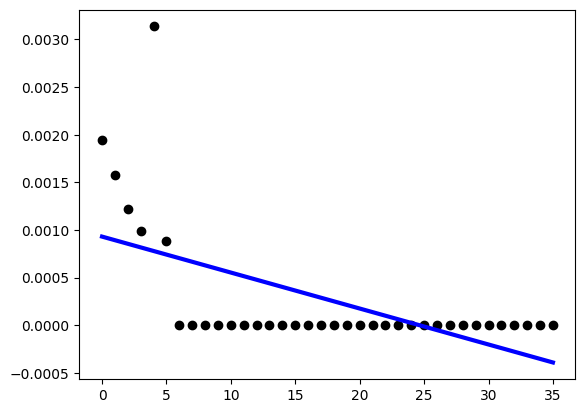

('ООО "СНЭК-ГРУП"', -0.0037735127001954647)

In [116]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ООО "СНЭК-ГРУП"') ,plot = True)

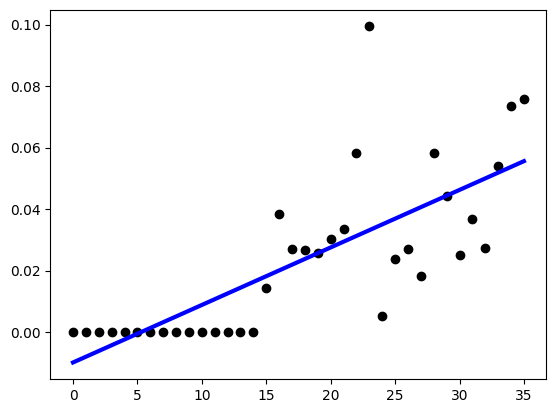

('ООО "МАСТЕРФУД"', 0.18709775151237212)

In [117]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ООО "МАСТЕРФУД"') ,plot = True)

In [118]:
# Всего одна компания проводит более десяти транзакций с высокой и одинаковой ценой. 
# ООО "МАРИН ТРЭЙД" count  12 price  224224.0

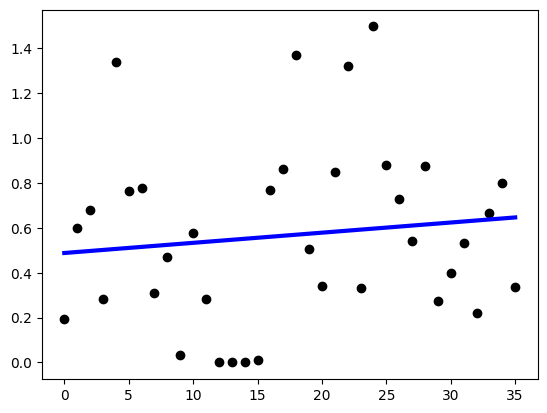

('ООО "МАРИН ТРЭЙД"', 0.4527058864727733)

In [119]:
MakeLinear(CompMonthlyData, list(CompMonthlyData).index('ООО "МАРИН ТРЭЙД"') ,plot = True)

In [120]:
# судя по графикам, точно можно сказать, что проведение одинаковых транзакций на влияет на динамику экспорта. 
# Есть компании как растущие, так и падающие в объемаъ
# Возможно им отказывают в проведении экспорта.

In [121]:
# Решение о выпуске товара 
# G43 (Признак корректировки таможенной стоимости)
# G36 (Преференции, особенности уплаты платежей)

In [122]:
senderNameDict['ИП БРЕДНИЙ ВАДИМ ВИТАЛЬЕВИЧ']["Решение о выпуске товара"].value_counts()

10.0    167
40.0     10
Name: Решение о выпуске товара, dtype: int64

In [123]:
senderNameDict['ООО "ЮГТЕХРЕСУРС"']["Решение о выпуске товара"].value_counts()

10.0    570
40.0     30
50.0      5
Name: Решение о выпуске товара, dtype: int64

In [124]:
senderNameDict['ООО "ТЭК"']["Решение о выпуске товара"].value_counts()

10.0    483
40.0     16
Name: Решение о выпуске товара, dtype: int64

In [125]:
senderNameDict['ООО "МОНОЛИТ"']["Решение о выпуске товара"].value_counts()

10.0    144
50.0     10
Name: Решение о выпуске товара, dtype: int64

In [126]:
senderNameDict['ОАО ПКП "МЕРИДИАН"']["Решение о выпуске товара"].value_counts()

10.0    180
Name: Решение о выпуске товара, dtype: int64

In [127]:
senderNameDict['ООО "СНЭК-ГРУП"']["Решение о выпуске товара"].value_counts()

10.0    224
Name: Решение о выпуске товара, dtype: int64

In [128]:
senderNameDict['ООО "МАСТЕРФУД"']["Решение о выпуске товара"].value_counts()

10.0    1498
Name: Решение о выпуске товара, dtype: int64

In [129]:
senderNameDict['ИП БРЕДНИЙ ВАДИМ ВИТАЛЬЕВИЧ']["G43 (Признак корректировки таможенной стоимости)"].value_counts()

Series([], Name: G43 (Признак корректировки таможенной стоимости), dtype: int64)

In [130]:
senderNameDict['ООО "ЮГТЕХРЕСУРС"']["G43 (Признак корректировки таможенной стоимости)"].value_counts()

0.0    14
Name: G43 (Признак корректировки таможенной стоимости), dtype: int64

In [131]:
senderNameDict['ООО "ТЭК"']["G43 (Признак корректировки таможенной стоимости)"].value_counts()

0.0    2
Name: G43 (Признак корректировки таможенной стоимости), dtype: int64

In [132]:
senderNameDict['ООО "МОНОЛИТ"']["G43 (Признак корректировки таможенной стоимости)"].value_counts()

0.0    12
Name: G43 (Признак корректировки таможенной стоимости), dtype: int64

In [133]:
senderNameDict['ОАО ПКП "МЕРИДИАН"']["G43 (Признак корректировки таможенной стоимости)"].value_counts()

Series([], Name: G43 (Признак корректировки таможенной стоимости), dtype: int64)

In [134]:
senderNameDict['ООО "СНЭК-ГРУП"']["G43 (Признак корректировки таможенной стоимости)"].value_counts()

Series([], Name: G43 (Признак корректировки таможенной стоимости), dtype: int64)

In [135]:
senderNameDict['ООО "МАСТЕРФУД"']["G43 (Признак корректировки таможенной стоимости)"].value_counts()

0.0    53
Name: G43 (Признак корректировки таможенной стоимости), dtype: int64

In [136]:
# нет, компаниям одобряют выпуск. всего 10 запретов  ООО "МОНОЛИТ" и только 
# Проверим теперь повторение одинаковых транзакций

In [137]:
FindSuspiciousTransactions(senderNameDict, 'G45 (Таможенная стоимость, руб)' , borderCount = 400)

ООО "ВИЧЮНАЙ-РУСЬ" count  433 price  0.0
ООО " ТОРГОВЫЙ ДОМ УЛЬТРА ФИШ" count  923 price  0.0
АО "РУССКОЕ МОРЕ" count  459 price  0.0
ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА count  796 price  0.0


In [138]:
# Транзакции с одинаковой массой есть, а вот транзакции с одинаковой ценой не обнаруживаются.
# Есть транзакции с ценой в ноль.

In [139]:
senderNameDict['ООО "ВИЧЮНАЙ-РУСЬ"']['G45 (Таможенная стоимость, руб)'].value_counts()

0.00         433
22388.34       2
18505.83       2
15350.69       2
27664.63       2
            ... 
217633.96      1
866006.47      1
25684.52       1
74984.70       1
17973.24       1
Name: G45 (Таможенная стоимость, руб), Length: 940, dtype: int64

In [140]:
senderNameDict['ООО " ТОРГОВЫЙ ДОМ УЛЬТРА ФИШ"']['G45 (Таможенная стоимость, руб)'].value_counts()

0.0    923
Name: G45 (Таможенная стоимость, руб), dtype: int64

In [141]:
senderNameDict['АО "РУССКОЕ МОРЕ"']['G45 (Таможенная стоимость, руб)'].value_counts()

0.0    459
Name: G45 (Таможенная стоимость, руб), dtype: int64

In [142]:
senderNameDict['ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА']['G45 (Таможенная стоимость, руб)'].value_counts()

0.00        796
1303.35       3
23870.48      3
554.84        2
1136.24       2
           ... 
21733.07      1
2212.08       1
7209.39       1
1270.56       1
1565.80       1
Name: G45 (Таможенная стоимость, руб), Length: 774, dtype: int64

In [143]:
# В общем в лоб подсчитать количество тразакций не получается

In [144]:
dataframe = collectAllInOneData(senderNameDict, 'G45 (Таможенная стоимость, руб)', DropNAN = True).fillna(0)

In [145]:
dataframe.describe().to_csv("транзакции .csv")
dataframe.describe()

ШУСТОВА СВЕТЛАНА ГЕННАДЬЕВНА ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ  ООО "АСР"  \
count                                       1.080000e+03               1080.0   
mean                                        1.983777e+05                  0.0   
std                                         1.282505e+06                  0.0   
min                                         0.000000e+00                  0.0   
25%                                         0.000000e+00                  0.0   
50%                                         0.000000e+00                  0.0   
75%                                         0.000000e+00                  0.0   
max                                         9.541908e+06                  0.0   

       ИП АТАНОВ ЮРИЙ АЛЕКСАНДРОВИЧ  ООО "ЮГ-РЫБА"   ООО "ТАЙРА"  \
count                  1.080000e+03         1080.0  1.080000e+03   
mean                   3.114681e+04            0.0  3.433004e+05   
std                    1.694911e+05            0.0  2.655588e+06   
min                    0.000000e+00            0.0  0.000000e+00   
25%                    0.000000e+00            0.0  0.000000e+00   
50%                    0.000000e+00            0.0  0.000000e+00   
75%                    0.000000e+00            0.0  0.000000e+00   
max                    1.841080e+06            0.0  4.106297e+07   

       ООО "ЛЕСНОЕ ПЛЮС"  ООО "БИЗНЕС ИНВЕСТОР"  ООО"ТАЙРА"  ООО "ФАВОРИТ"  \
count             1080.0                 1080.0      1080.0   1.080000e+03   
mean                 0.0                    0.0         0.0   2.082112e+05   
std                  0.0                    0.0         0.0   7.968672e+05   
min                  0.0                    0.0         0.0   0.000000e+00   
25%                  0.0                    0.0         0.0   0.000000e+00   
50%                  0.0                    0.0         0.0   0.000000e+00   
75%                  0.0                    0.0         0.0   0.000000e+00   
max                  0.0                    0.0         0.0   6.005395e+06   

       ООО "РОС-АБХАЗ-ЭКСПОРТ"  ...  ООО"МИР МОРЕПРОДУКТОВ"  ООО"ПРИЛИВ"  \
count              1080.000000  ...                  1080.0       1080.0   
mean                 14.232324  ...                     0.0          0.0   
std                 376.425102  ...                     0.0          0.0   
min                   0.000000  ...                     0.0          0.0   
25%                   0.000000  ...                     0.0          0.0   
50%                   0.000000  ...                     0.0          0.0   
75%                   0.000000  ...                     0.0          0.0   
max               11867.330000  ...                     0.0          0.0   

       ООО"ОЛ ЭКСПОРТ"  ООО"МОНОЛИТ-МОСКВА"  АО"АРИАЛ"  \
count           1080.0               1080.0     1080.0   
mean               0.0                  0.0        0.0   
std                0.0                  0.0        0.0   
min                0.0                  0.0        0.0   
25%                0.0                  0.0        0.0   
50%                0.0                  0.0        0.0   
75%                0.0                  0.0        0.0   
max                0.0                  0.0        0.0   

       ОАО"ВОЛГОРЕЧЕНСКРЫБХОЗ"  ООО"ЗОЛОТАЯ СЕТЬ"  250302763910  \
count                   1080.0             1080.0        1080.0   
mean                       0.0                0.0           0.0   
std                        0.0                0.0           0.0   
min                        0.0                0.0           0.0   
25%                        0.0                0.0           0.0   
50%                        0.0                0.0           0.0   
75%                        0.0                0.0           0.0   
max                        0.0                0.0           0.0   

       ИП ЖАРКОВ ЕВГЕНИЙ АНАТОЛЬЕВИЧ ПАС. 05 03 757953 ОТ 23.01.2004Г  \
count                                             1080.0                
mea

In [146]:
# По таблице посмотреть дубликаты нельзя, но зато Среднее значение четырех компаний довольно низкое, Проверим четыре подозрительные компании
# 'ООО "ЭРА-ЭКСПОРТ"'
# 'ИП ОВСЯНИЦКАЯ ГАЛИНА НИКОЛАЕВНА'
# 'ООО "ОЯНГ"'
# 'ООО "ЛИТЕКС"'

In [147]:
senderNameDict['ООО "ЭРА-ЭКСПОРТ"']['G45 (Таможенная стоимость, руб)'].value_counts()

7288.50    1
3434.24    1
Name: G45 (Таможенная стоимость, руб), dtype: int64

In [148]:
senderNameDict['ИП ОВСЯНИЦКАЯ ГАЛИНА НИКОЛАЕВНА']['G45 (Таможенная стоимость, руб)'].value_counts()

0.00         90
189474.75     1
125255.20     1
11634.76      1
78910.19      1
106535.16     1
Name: G45 (Таможенная стоимость, руб), dtype: int64

In [149]:
senderNameDict['ООО "ОЯНГ"']['G45 (Таможенная стоимость, руб)'].value_counts()

0.00         5
597906.05    1
Name: G45 (Таможенная стоимость, руб), dtype: int64

In [150]:
senderNameDict['ООО "ЛИТЕКС"']['G45 (Таможенная стоимость, руб)'].value_counts()

0.00        80
5099.92      2
5940.30      1
59621.71     1
997.67       1
16499.86     1
11549.71     1
24419.84     1
26125.04     1
9360.09      1
7903.69      1
9499.84      1
14040.14     1
33558.09     1
2625.16      1
Name: G45 (Таможенная стоимость, руб), dtype: int64

In [151]:
# можно с высокой уверенностью сказать, что есть только компании, указывающие цену в 0.0
# Но тех, которые регулярно проводят одинаковые по цене транзакции найти не удается. 

In [152]:
# Делаем прогноз с помощью модели ETS. 
# Использование модели ARIMA Отпало по нескольким причинам: 
# Довольно ресурсоемкий расчет при условии сезонности в среднем 180 строк
# Ряды по большей части прослеживаются слабо и не всегда стационарны(автокорреляция).
# ETS лучше, чем арима справляется с пониманием тренда и обходом зашумленности данных.

In [157]:
# Построим модели выборочно для:
#     наиболее крупных стран импортеров: 'КИТАЙ', 'УКРАИНА' и 'КОРЕЯ, РЕСПУБЛИКА'
#     Наиболее крупную страну экспортера: 'РОССИЯ'
    
#     Наиболее Растущего региона поставщика: 'РОСТОВСКАЯ ОБЛАСТЬ'
#     а также наиболее падающего региона: 'ВОРОНЕЖСКАЯ ОБЛАСТЬ' 
#     Самые крупные регионы поставщики: 'ПРИМОРСКИЙ КРАЙ', 'КАМЧАТСКАЯ ОБЛАСТЬ' и  'МОСКОВСКАЯ ОБЛАСТЬ'
    
#     Среди компаний выберем следующие:
#     экспортер, проводящий наиболее часто экспорт: 'ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА'
#     а также компании наиболее крупные в части объемов поставок и таможенной стоимости:
#     'АО НОРЕБО АЗИЯ'
#     'ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"'
#     'ПАО ОКЕАНРЫБФЛОТ'

время сезона = 174


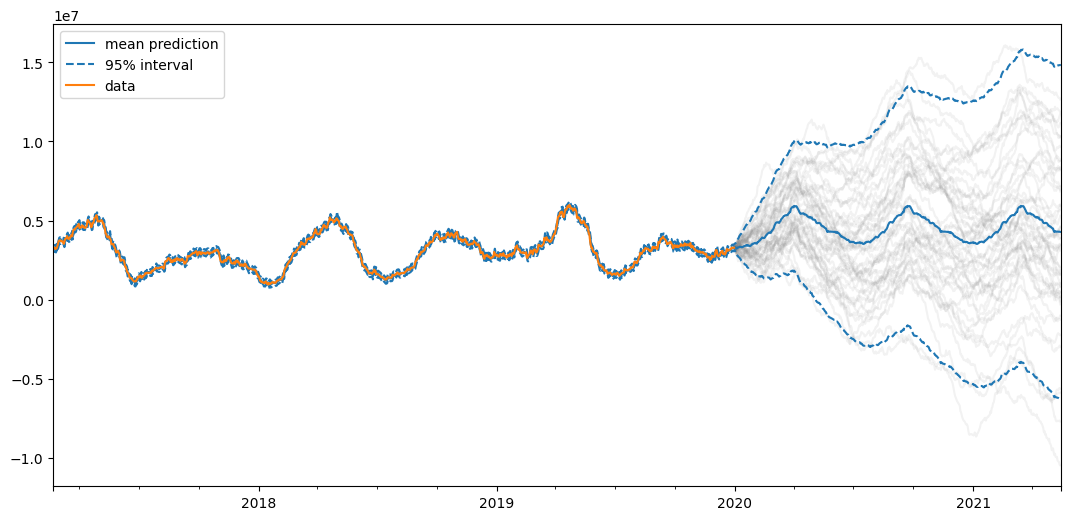

In [164]:
ts = func(destinationCountryDict['КИТАЙ'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 174


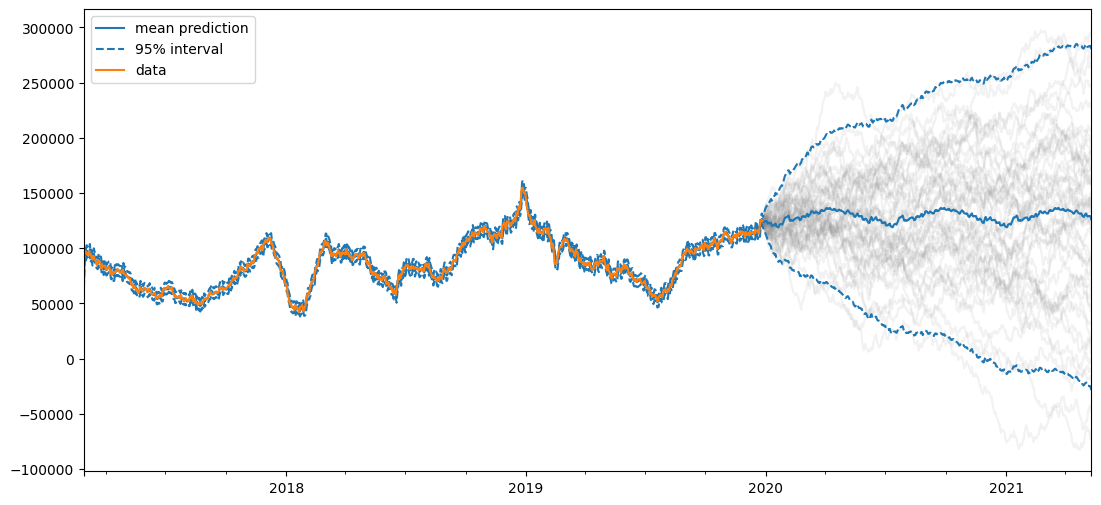

In [165]:
ts = func(destinationCountryDict['УКРАИНА'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 208


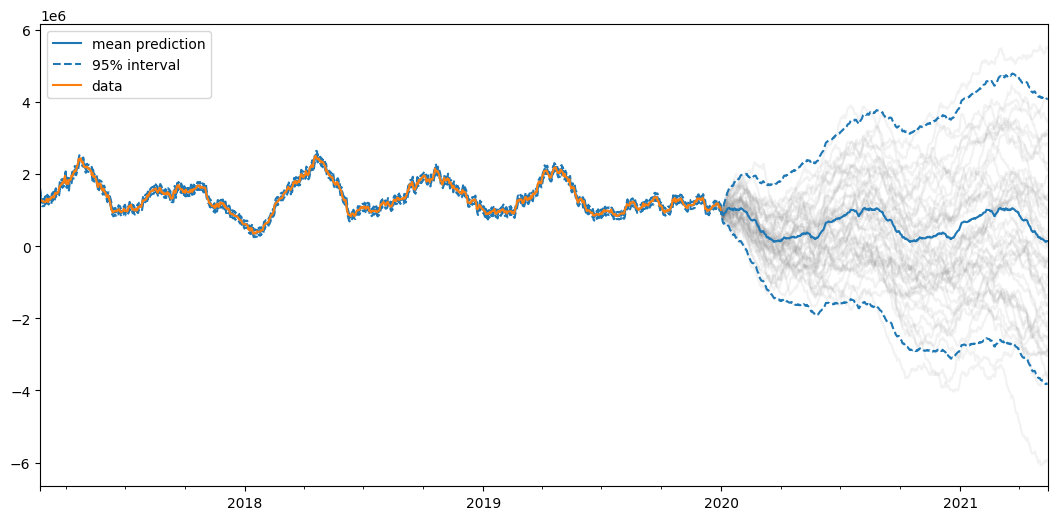

In [166]:
ts = func(destinationCountryDict['КОРЕЯ, РЕСПУБЛИКА'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

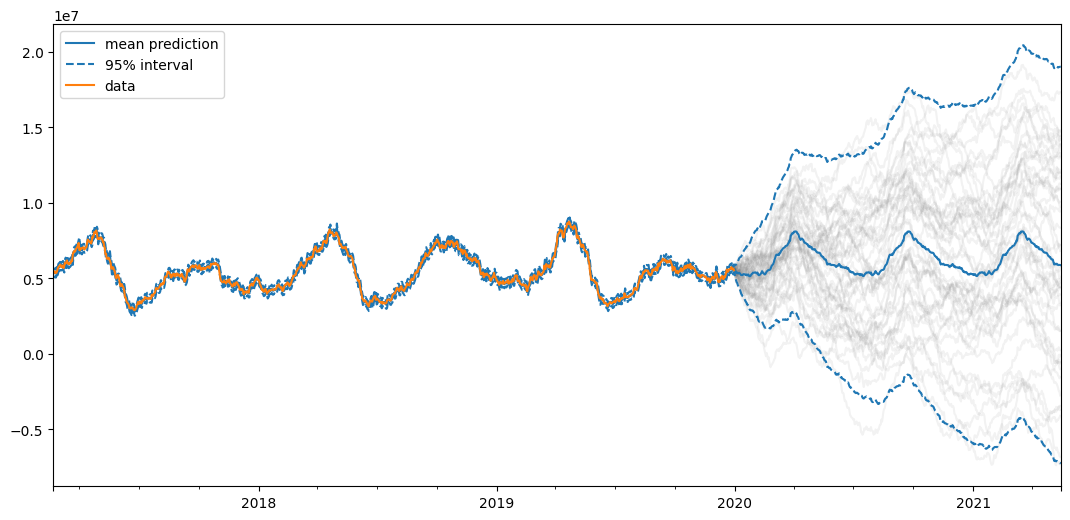

In [159]:
ts = func(originCountryDict["РОССИЯ"])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)


In [ ]:
    
#     Наиболее Растущего региона поставщика: 'РОСТОВСКАЯ ОБЛАСТЬ'
#     а также наиболее падающего региона: 'ВОРОНЕЖСКАЯ ОБЛАСТЬ' 
#     Самые крупные регионы поставщики: 'ПРИМОРСКИЙ КРАЙ', 'КАМЧАТСКАЯ ОБЛАСТЬ' и  'МОСКОВСКАЯ ОБЛАСТЬ'
    

время сезона = 174


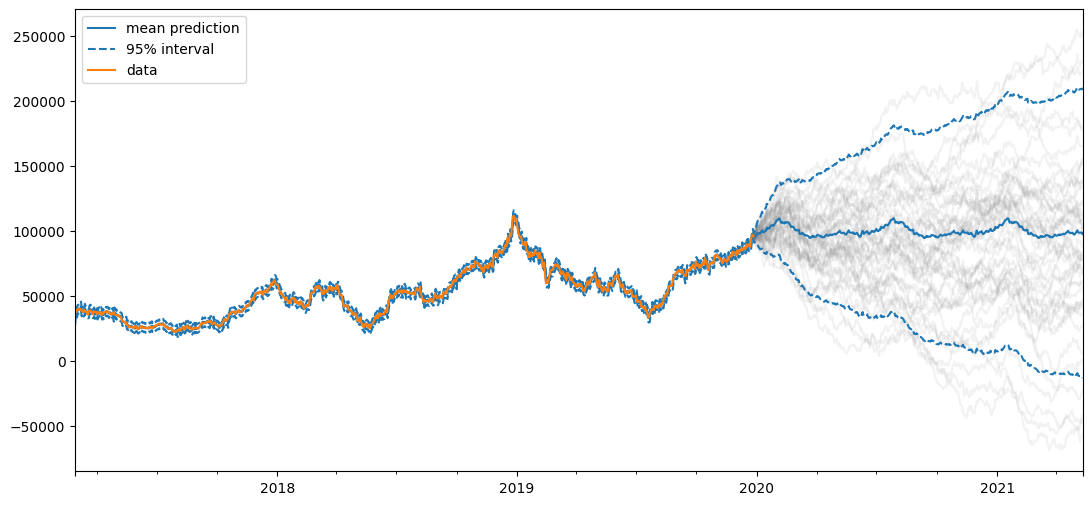

In [167]:
ts = func( senderRegionDict['РОСТОВСКАЯ ОБЛАСТЬ'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 117


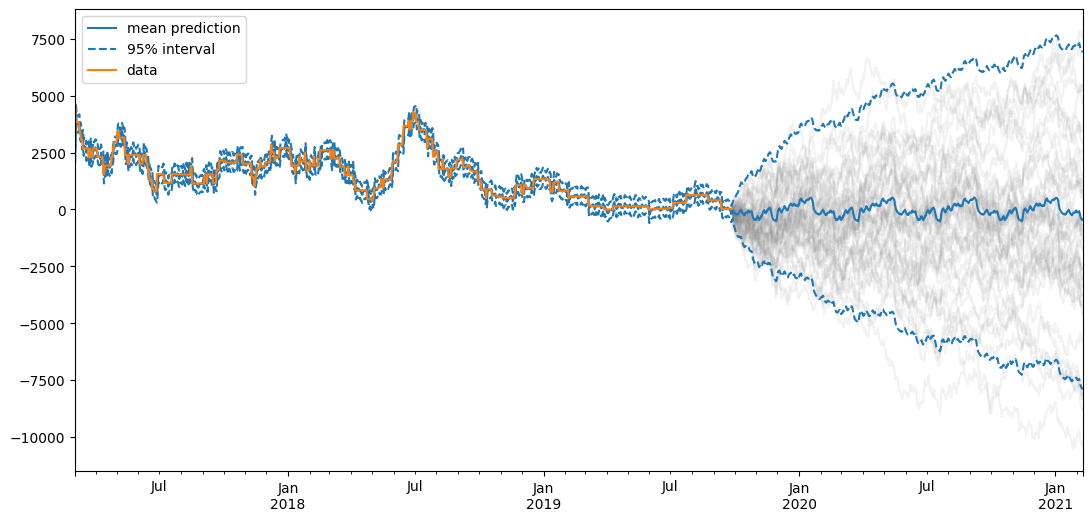

In [168]:
ts = func( senderRegionDict['ВОРОНЕЖСКАЯ ОБЛАСТЬ'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 149


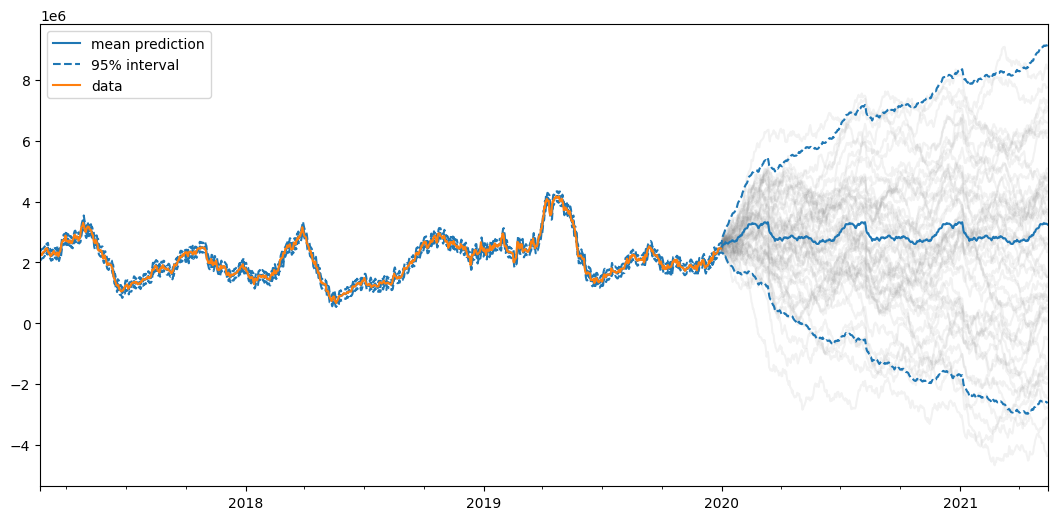

In [169]:
ts = func(senderRegionDict['ПРИМОРСКИЙ КРАЙ'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 173


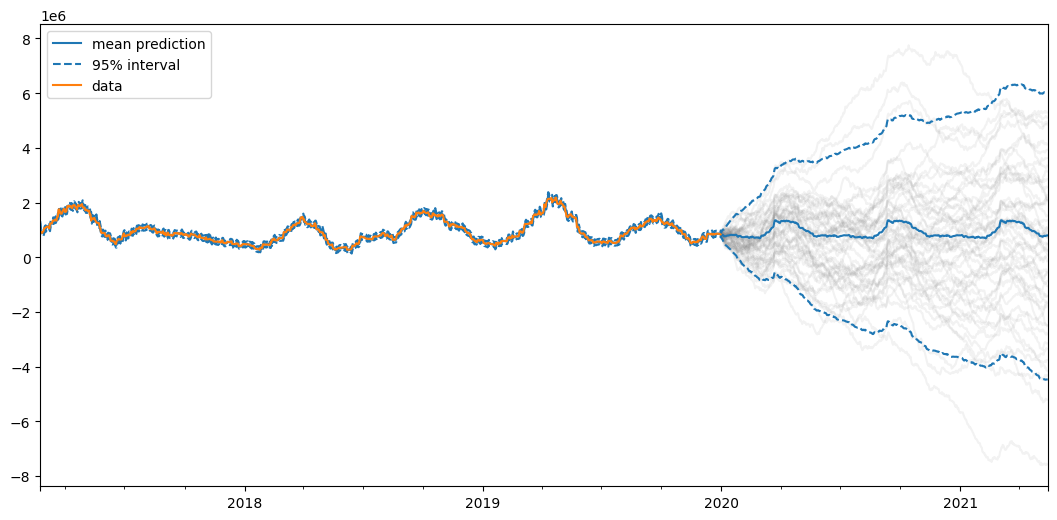

In [171]:
ts = func(senderRegionDict['КАМЧАТСКАЯ ОБЛАСТЬ'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 147


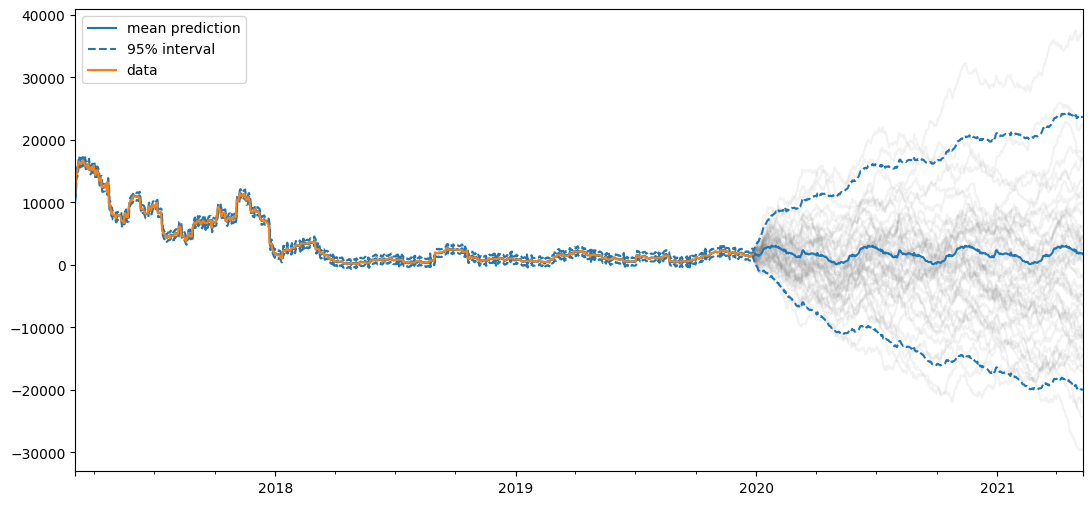

In [172]:
ts = func(senderRegionDict['МОСКОВСКАЯ ОБЛАСТЬ'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

In [173]:
#     Среди компаний выберем следующие:
#     экспортер, проводящий наиболее часто экспорт: 'ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА'
#     а также компании наиболее крупные в части объемов поставок и таможенной стоимости:
#     'АО НОРЕБО АЗИЯ'
#     'ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"'
#     'ПАО ОЕАНРЫБОФЛОТ'

время сезона = 173


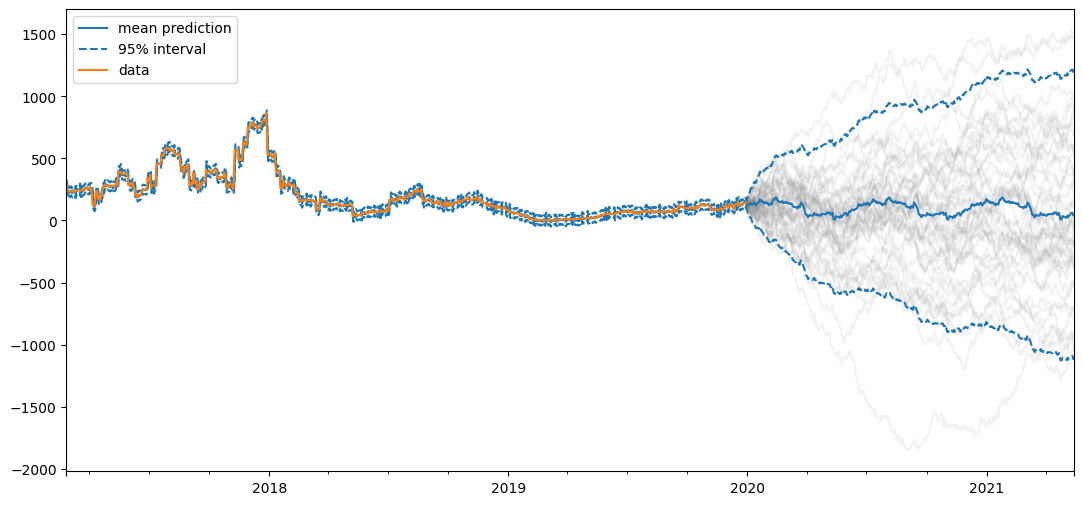

In [174]:
ts = func(senderNameDict['ИП ШАГДАРОВА ИНДИРА ВАЛЕРЬЕВНА'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 160


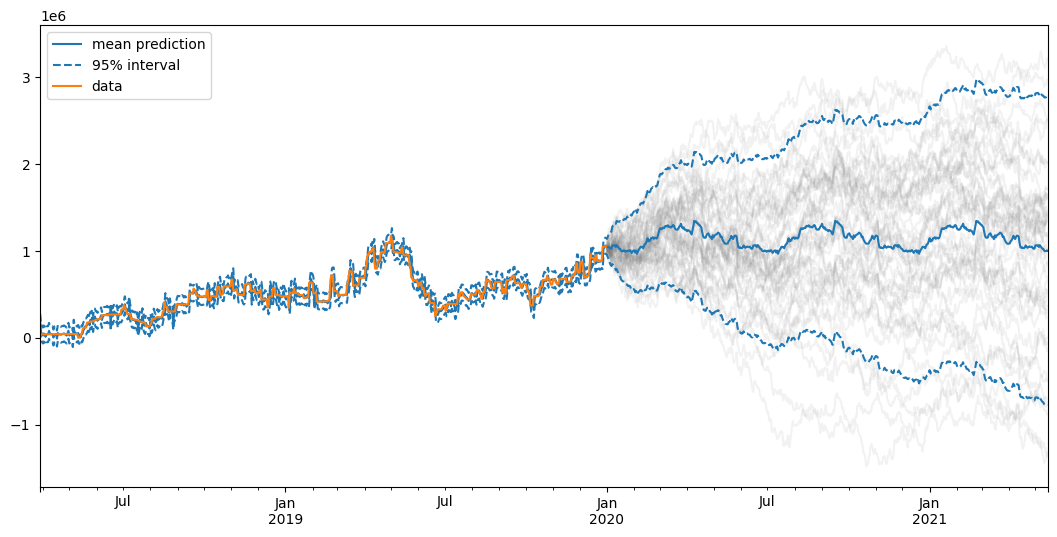

In [175]:
ts = func(senderNameDict['АО НОРЕБО АЗИЯ'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 172


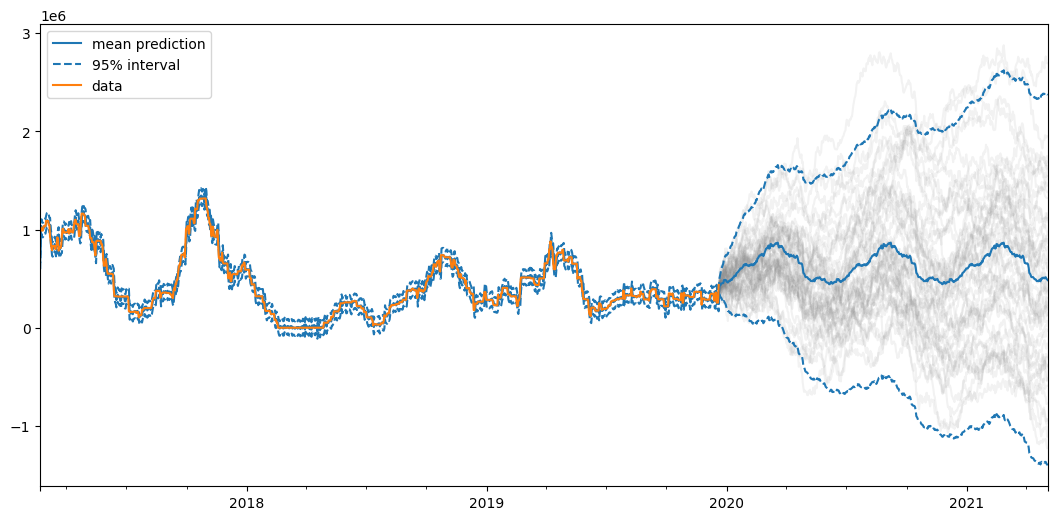

In [176]:
ts = func(senderNameDict['ООО "РУССКАЯ РЫБОПРОМЫШЛЕННАЯ КОМПАНИЯ"'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

время сезона = 143


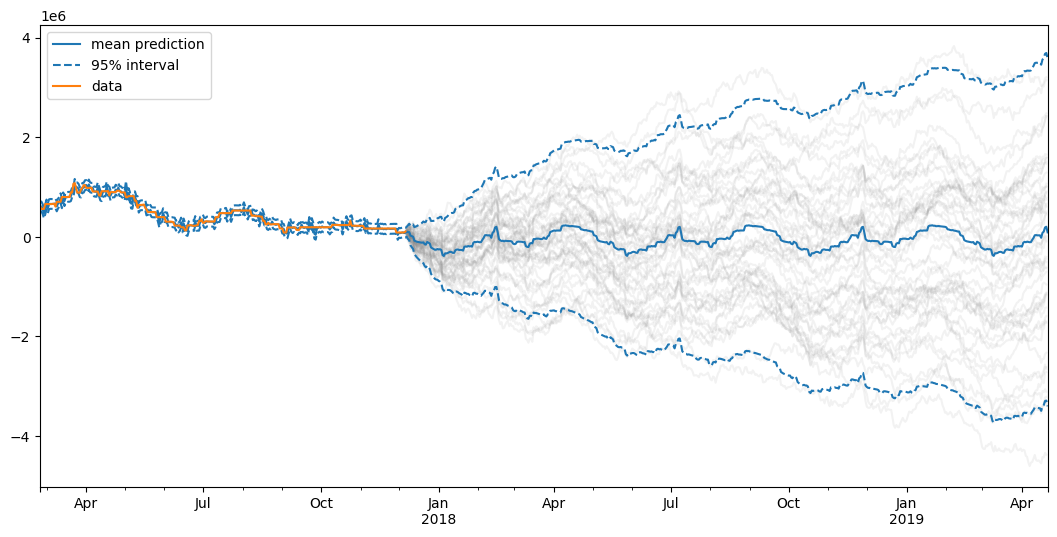

In [179]:
ts = func(senderNameDict['ПАО "ОКЕАНРЫБФЛОТ"'])
model, predictedDF = MakeModel(ts, seasonal_periods = countPeaksDelta(ts, 'G38 (Вес нетто)',plot = False), percentPredict = 50)
plotModel(model,"mean prediction", ts,500)

In [153]:
# Мы можем построить модели для каждого региона, компании и любого другого субъекта и затем сохранить их в словари, если есть необходимость.

In [154]:
# модели ЕТС по организациям
senderNameModelsSlovar, senderNamePredictionsSlovar, senderNameDataSlovar = MakeETSModels(senderNameDict, 'G38 (Вес нетто)',plot = False)

In [155]:
# модели ЕТС по регионам отправителям
senderRegionModelsSlovar, senderRegionPredictionsSlovar, senderRegionDataSlovar = MakeETSModels(senderRegionDict, 'G38 (Вес нетто)',plot = False)

In [156]:
# модели ЕТС по странам назанчения
destinationCountryModelsSlovar, destinationCountryPredictionsSlovar, destinationCountryDataSlovar = MakeETSModels(destinationCountryDict, 'G38 (Вес нетто)',plot = False)